# Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import xgboost as xgb
import optuna

from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_data = '/content/drive/My Drive/Datasets/ML_exam/Xy_train.csv'
test_data = '/content/drive/My Drive/Datasets/ML_exam/X_test.csv'

In [ ]:
df_train = pd.read_csv(train_data)
df_test =  pd.read_csv(test_data)

In [ ]:
df_train.head()

,vision_left,vision_right,ear_left,ear_right,years,mass,height_cm,waist_cm,glucose_fasting,cholesterol_total,...,upper_pressure,lower_pressure,tooth_decay,blood_coloring,muscle_waste,protein_urine,liver_health1,liver_health2,liver_indicator,smoke_status
0,0.9,0.8,1,1,45,70,155,90.0,92,229,...,119,80,0,14.5,0.8,1,17,13,17,0
1,1.0,0.9,1,1,40,45,155,64.0,96,155,...,104,67,0,10.2,0.8,1,20,10,9,0
2,0.9,0.9,1,1,60,55,170,68.0,97,203,...,120,80,0,13.7,0.9,1,26,19,19,0
3,1.2,1.2,1,1,40,85,175,92.0,88,186,...,127,76,0,16.3,1.1,1,70,113,47,0
4,1.2,0.3,1,1,35,65,180,78.9,89,169,...,120,85,0,14.9,0.9,1,21,13,14,0


In [ ]:
df_test.head()

,vision_left,vision_right,ear_left,ear_right,years,mass,height_cm,waist_cm,glucose_fasting,cholesterol_total,...,cholesterol_bad,upper_pressure,lower_pressure,tooth_decay,blood_coloring,muscle_waste,protein_urine,liver_health1,liver_health2,liver_indicator
0,1.2,1.2,1,1,25,80,175,87.0,99,173,...,99,114,76,0,16.0,1.2,1,32,38,14
1,1.0,1.0,1,1,55,65,170,78.0,93,168,...,109,132,80,1,12.8,1.0,1,28,21,15
2,1.0,0.7,1,1,50,70,170,80.0,109,224,...,143,140,80,0,16.5,1.1,1,31,34,98
3,1.0,1.0,1,1,40,50,160,82.0,88,145,...,39,100,64,0,12.9,0.8,1,27,24,38
4,1.5,1.2,1,1,30,60,170,80.0,84,196,...,109,133,71,0,15.9,0.9,1,27,22,21


In [ ]:
set(df_train.columns.unique()).difference(df_test.columns.unique())

{'smoke_status'}

In [ ]:
df_train.shape

(31187, 23)

In [ ]:
df_test.shape

(7797, 22)

In [ ]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
vision_left,31187.0,1.014561,0.495658,0.1,0.8,1.0,1.20,9.9
vision_right,31187.0,1.006984,0.487994,0.1,0.8,1.0,1.20,9.9
ear_left,31187.0,1.025459,0.157518,1.0,1.0,1.0,1.00,2.0
ear_right,31187.0,1.026293,0.160008,1.0,1.0,1.0,1.00,2.0
years,31187.0,44.137942,12.111332,20.0,40.0,40.0,55.00,85.0
mass,31187.0,65.944143,12.904303,30.0,55.0,65.0,75.00,135.0
height_cm,31187.0,164.655786,9.200953,130.0,160.0,165.0,170.00,190.0
waist_cm,31187.0,82.086597,9.330870,51.0,76.0,82.0,88.00,129.0
glucose_fasting,31187.0,99.299933,20.563503,46.0,89.0,96.0,104.00,423.0
cholesterol_total,31187.0,196.765319,36.320511,55.0,172.0,195.0,219.00,445.0


In [ ]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
vision_left,7797.0,1.016532,0.509872,0.1,0.8,1.0,1.2,9.9
vision_right,7797.0,1.015904,0.516402,0.1,0.8,1.0,1.2,9.9
ear_left,7797.0,1.025010,0.156164,1.0,1.0,1.0,1.0,2.0
ear_right,7797.0,1.025779,0.158486,1.0,1.0,1.0,1.0,2.0
years,7797.0,44.086187,11.871253,20.0,40.0,40.0,50.0,85.0
mass,7797.0,65.917019,12.866452,35.0,55.0,65.0,75.0,130.0
height_cm,7797.0,164.824291,9.132872,140.0,160.0,165.0,170.0,190.0
waist_cm,7797.0,81.964191,9.310446,51.0,75.4,82.0,88.0,124.0
glucose_fasting,7797.0,99.511607,20.957169,60.0,89.0,96.0,104.0,391.0
cholesterol_total,7797.0,197.356163,36.485875,91.0,172.0,195.0,220.0,442.0


In [ ]:
df_train.isna().sum()

vision_left          0
vision_right         0
ear_left             0
ear_right            0
years                0
mass                 0
height_cm            0
waist_cm             0
glucose_fasting      0
cholesterol_total    0
fat_ratio            0
cholesterol_good     0
cholesterol_bad      0
upper_pressure       0
lower_pressure       0
tooth_decay          0
blood_coloring       0
muscle_waste         0
protein_urine        0
liver_health1        0
liver_health2        0
liver_indicator      0
smoke_status         0
dtype: int64

In [ ]:
df_test.isna().sum()

vision_left          0
vision_right         0
ear_left             0
ear_right            0
years                0
mass                 0
height_cm            0
waist_cm             0
glucose_fasting      0
cholesterol_total    0
fat_ratio            0
cholesterol_good     0
cholesterol_bad      0
upper_pressure       0
lower_pressure       0
tooth_decay          0
blood_coloring       0
muscle_waste         0
protein_urine        0
liver_health1        0
liver_health2        0
liver_indicator      0
dtype: int64

No missing values both in test and train datas

In [ ]:
# Create an empty dictionary to store the results
features_high_frequency = {}

# Iterate over each column in the dataframe
for column in df_train.columns:
    # Calculate the frequency of the most common value
    most_common_freq = df_train[column].value_counts(normalize=True).iloc[0]

    # Check if the frequency is greater than 0.9 (90%)
    if most_common_freq >= 0.9:
        # Add the column and its frequency to the dictionary
        features_high_frequency[column] = most_common_freq

# Convert the dictionary to a DataFrame for better readability
features_high_frequency_df = pd.DataFrame(features_high_frequency.items(), columns=['Feature', 'Frequency'])

# Display the features with more than 90% of values being the same
print(features_high_frequency_df)

         Feature  Frequency
0       ear_left   0.974541
1      ear_right   0.973707
2  protein_urine   0.945490


In [ ]:
# Create an empty dictionary to store the results
features_high_frequency_test = {}

# Iterate over each column in the dataframe
for column in df_test.columns:
    # Calculate the frequency of the most common value
    most_common_freq = df_test[column].value_counts(normalize=True).iloc[0]

    # Check if the frequency is greater than 0.9 (90%)
    if most_common_freq >= 0.9:
        # Add the column and its frequency to the dictionary
        features_high_frequency_test[column] = most_common_freq

# Convert the dictionary to a DataFrame for better readability
features_high_frequency_df_test = pd.DataFrame(features_high_frequency_test.items(), columns=['Feature', 'Frequency'])

# Display the features with more than 90% of values being the same
print(features_high_frequency_df_test)

         Feature  Frequency
0       ear_left   0.974990
1      ear_right   0.974221
2  protein_urine   0.942542


There are 3 features having high frequency both in train and test data

In [ ]:
def get_unique_vals(col, df):
  print(sorted(df[col].unique()))
  print(f'Column is : {col} \n')

In [ ]:
for c in df_train.columns:
  get_unique_vals(c, df_train)

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.5, 1.6, 2.0, 9.9]
Column is : vision_left 

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.5, 1.6, 2.0, 9.9]
Column is : vision_right 

[1, 2]
Column is : ear_left 

[1, 2]
Column is : ear_right 

[20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85]
Column is : years 

[30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135]
Column is : mass 

[130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190]
Column is : height_cm 

[51.0, 54.0, 55.0, 56.0, 56.6, 57.0, 57.4, 57.5, 57.7, 58.0, 58.1, 58.2, 58.5, 58.9, 59.0, 59.2, 59.3, 59.5, 59.7, 59.8, 59.9, 60.0, 60.2, 60.3, 60.4, 60.5, 60.8, 60.9, 61.0, 61.1, 61.2, 61.3, 61.4, 61.5, 61.7, 61.8, 62.0, 62.1, 62.2, 62.3, 62.4, 62.5, 62.6, 62.7, 62.8, 63.0, 63.1, 63.2, 63.3, 63.4, 63.5, 63.6, 63.7, 63.8, 63.9, 64.0, 64.2, 64.3, 64.4, 64.5, 64.6, 64.7, 64.8, 64.9, 65.0, 65.1, 65.2, 65.3, 65.4, 65.5, 65.6, 65.7

In [ ]:
for c in df_test.columns:
  get_unique_vals(c, df_test)

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.5, 1.6, 1.8, 1.9, 2.0, 9.9]
Column is : vision_left 

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.5, 1.6, 2.0, 9.9]
Column is : vision_right 

[1, 2]
Column is : ear_left 

[1, 2]
Column is : ear_right 

[20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85]
Column is : years 

[35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130]
Column is : mass 

[140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190]
Column is : height_cm 

[51.0, 56.0, 56.2, 57.0, 58.0, 59.0, 59.1, 59.8, 59.9, 60.0, 60.3, 60.8, 60.9, 61.0, 61.2, 61.3, 61.5, 61.8, 62.0, 62.1, 62.2, 62.3, 62.5, 62.6, 63.0, 63.2, 63.3, 63.4, 63.5, 63.7, 63.8, 63.9, 64.0, 64.2, 64.3, 64.5, 64.6, 64.7, 64.8, 64.9, 65.0, 65.2, 65.4, 65.5, 65.6, 65.8, 66.0, 66.1, 66.2, 66.3, 66.4, 66.5, 66.6, 66.7, 66.8, 66.9, 67.0, 67.1, 67.2, 67.3, 67.4, 67.5, 67.7, 67.8, 67.9, 68.0, 68.1, 68.2, 68.3, 68.4, 68.5, 68.6, 68.7, 68.8, 68.9,

In [ ]:
df_train.dtypes

vision_left          float64
vision_right         float64
ear_left               int64
ear_right              int64
years                  int64
mass                   int64
height_cm              int64
waist_cm             float64
glucose_fasting        int64
cholesterol_total      int64
fat_ratio              int64
cholesterol_good       int64
cholesterol_bad        int64
upper_pressure         int64
lower_pressure         int64
tooth_decay            int64
blood_coloring       float64
muscle_waste         float64
protein_urine          int64
liver_health1          int64
liver_health2          int64
liver_indicator        int64
smoke_status           int64
dtype: object

In [ ]:
df_test.dtypes

vision_left          float64
vision_right         float64
ear_left               int64
ear_right              int64
years                  int64
mass                   int64
height_cm              int64
waist_cm             float64
glucose_fasting        int64
cholesterol_total      int64
fat_ratio              int64
cholesterol_good       int64
cholesterol_bad        int64
upper_pressure         int64
lower_pressure         int64
tooth_decay            int64
blood_coloring       float64
muscle_waste         float64
protein_urine          int64
liver_health1          int64
liver_health2          int64
liver_indicator        int64
dtype: object

In [ ]:
df_train = df_train.drop_duplicates()

In [ ]:
df_train.shape

(27623, 23)

In [ ]:
def plot_diff (feat):
  plt.figure(figsize=(15, 8))

  # Histogram
  plt.subplot(2, 1, 1)
  sns.histplot(df_train[feat], kde=True)
  plt.title('Histogram')

  # Boxplot
  plt.subplot(2, 1, 2)
  sns.boxplot(x=df_train[feat])
  plt.title('Boxplot')

  plt.tight_layout()
  plt.show()

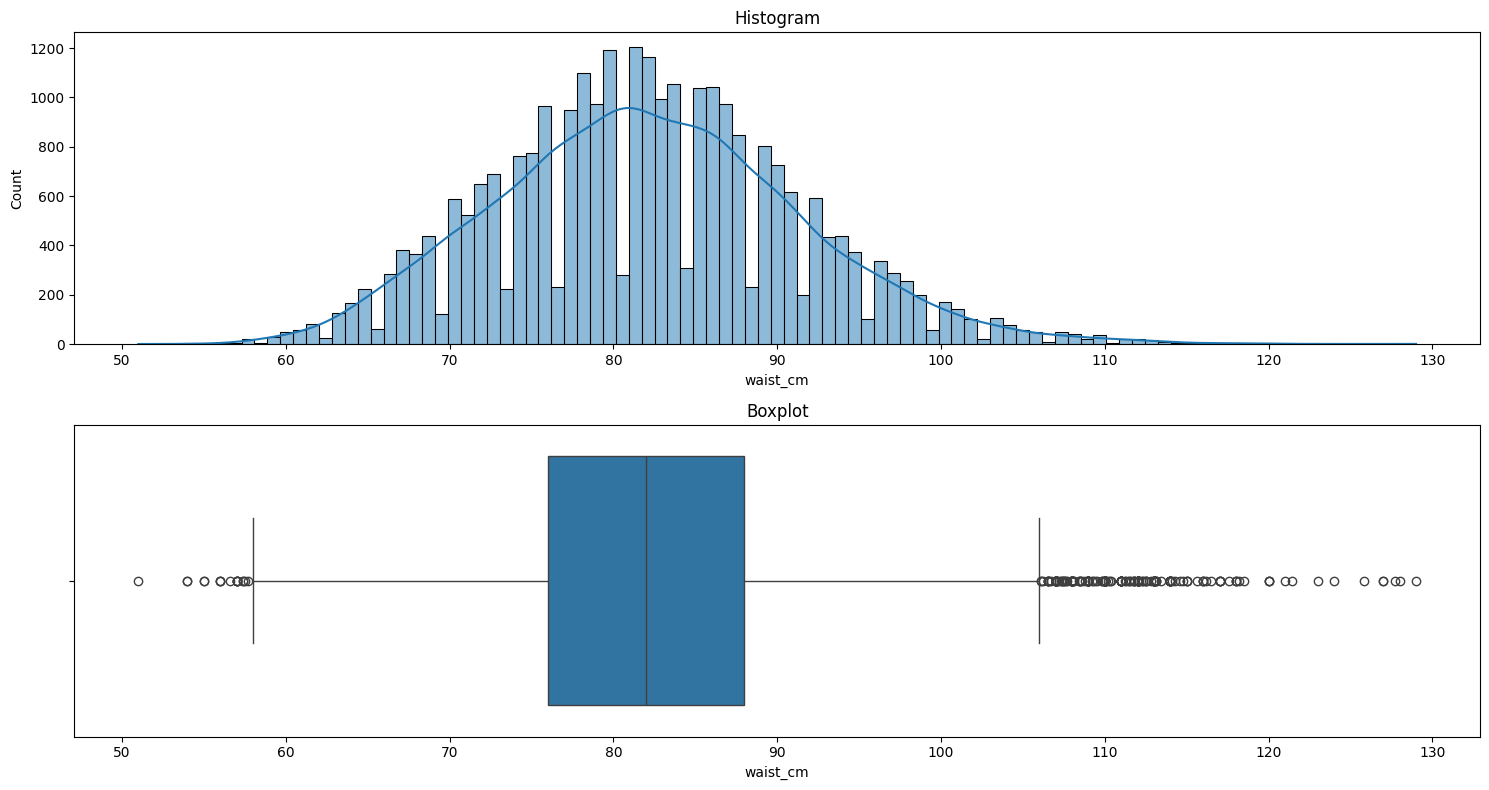

In [ ]:
def remove_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    return df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

df_clean = remove_outliers(df_train, 'waist_cm')
df_clean = remove_outliers(df_clean, 'glucose_fasting')

plot_diff('waist_cm')

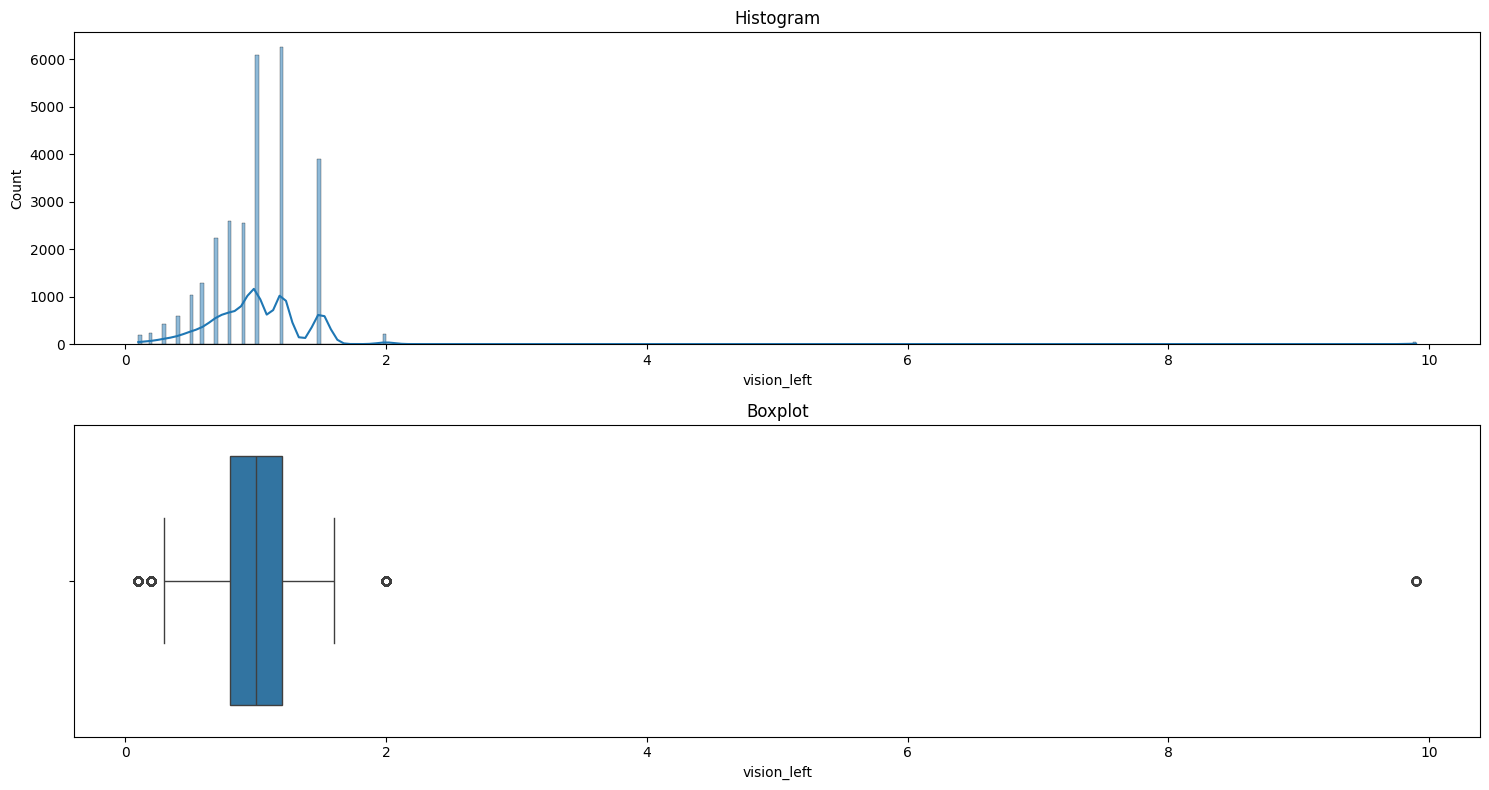

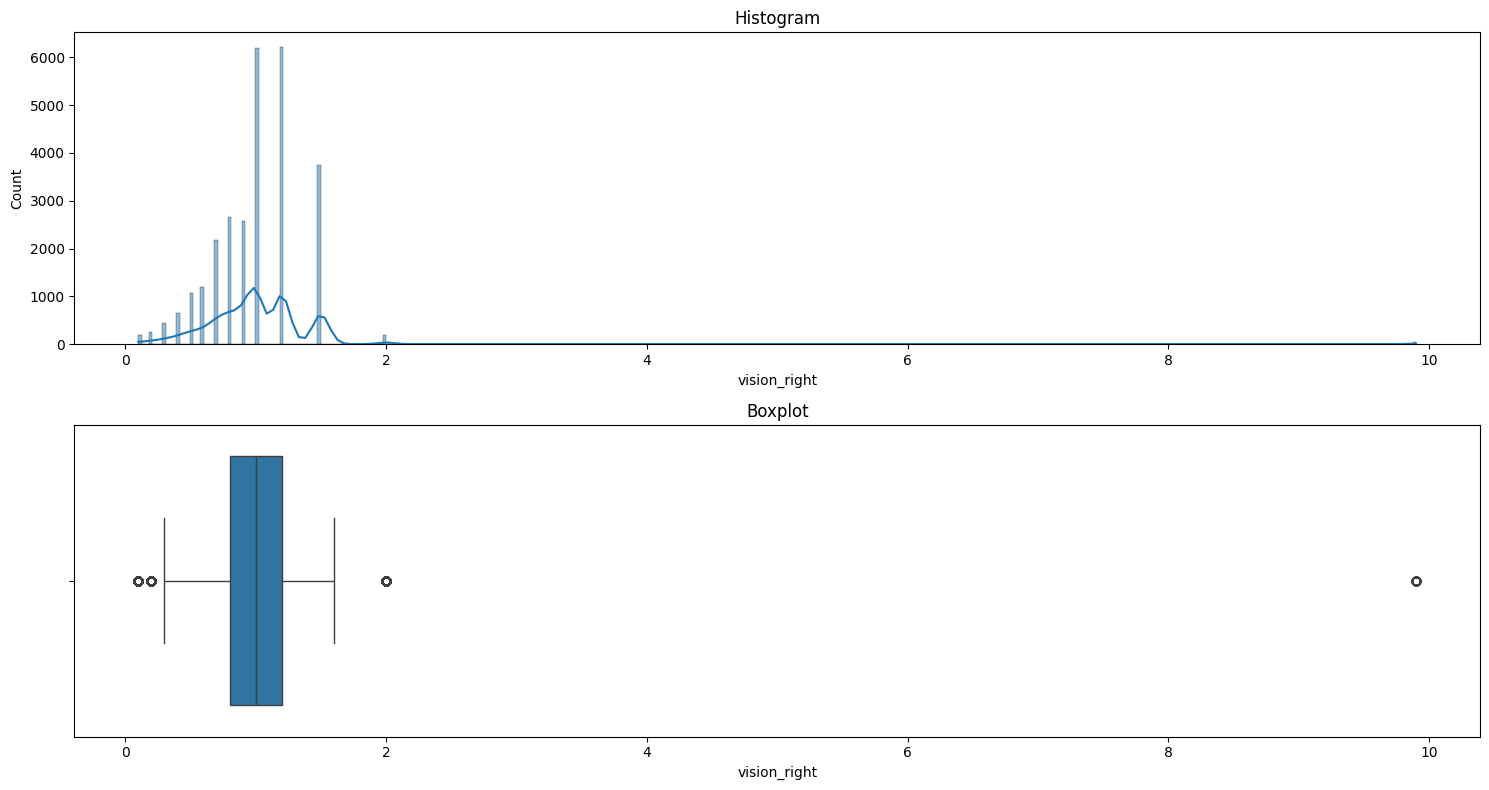

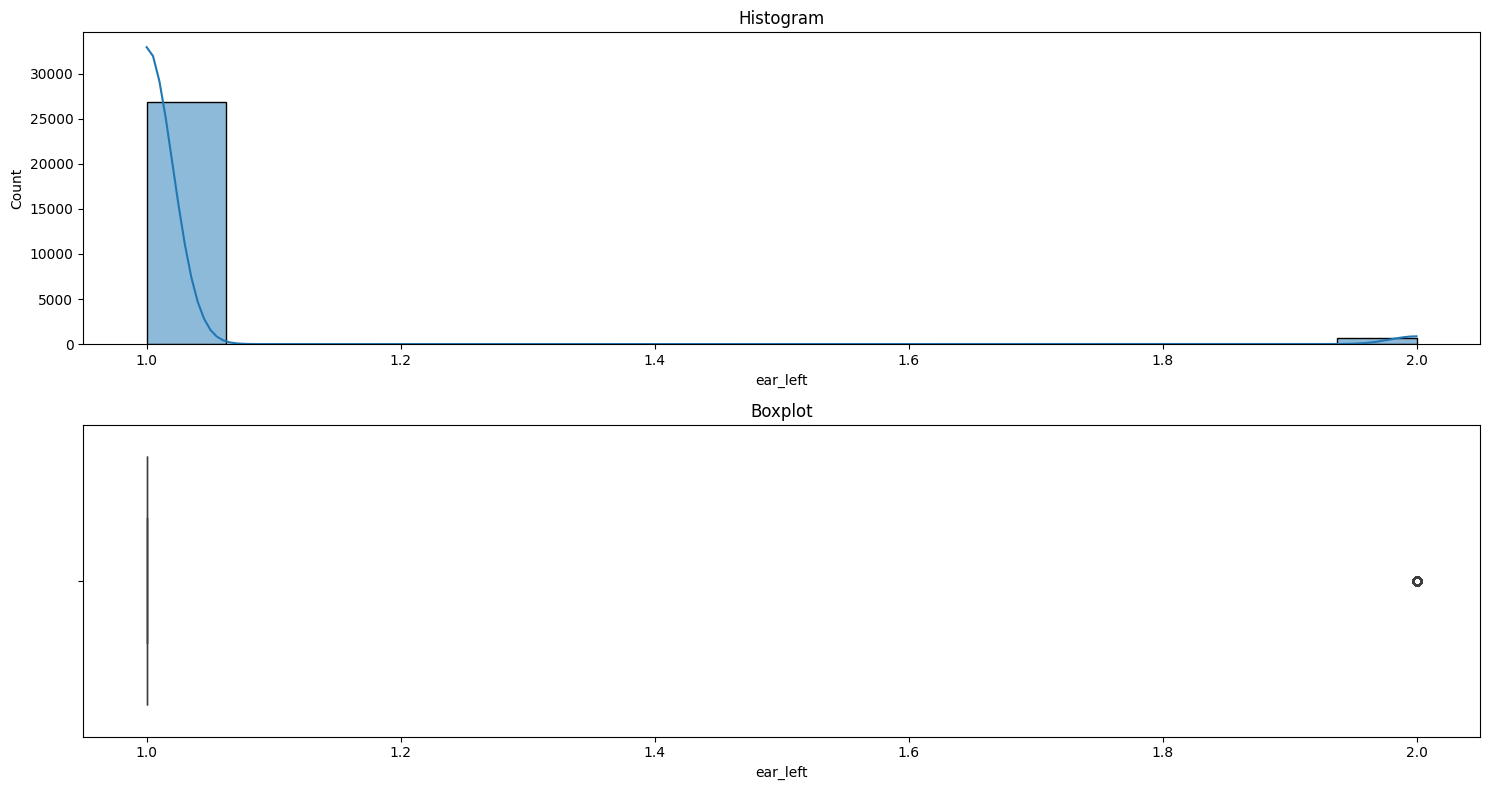

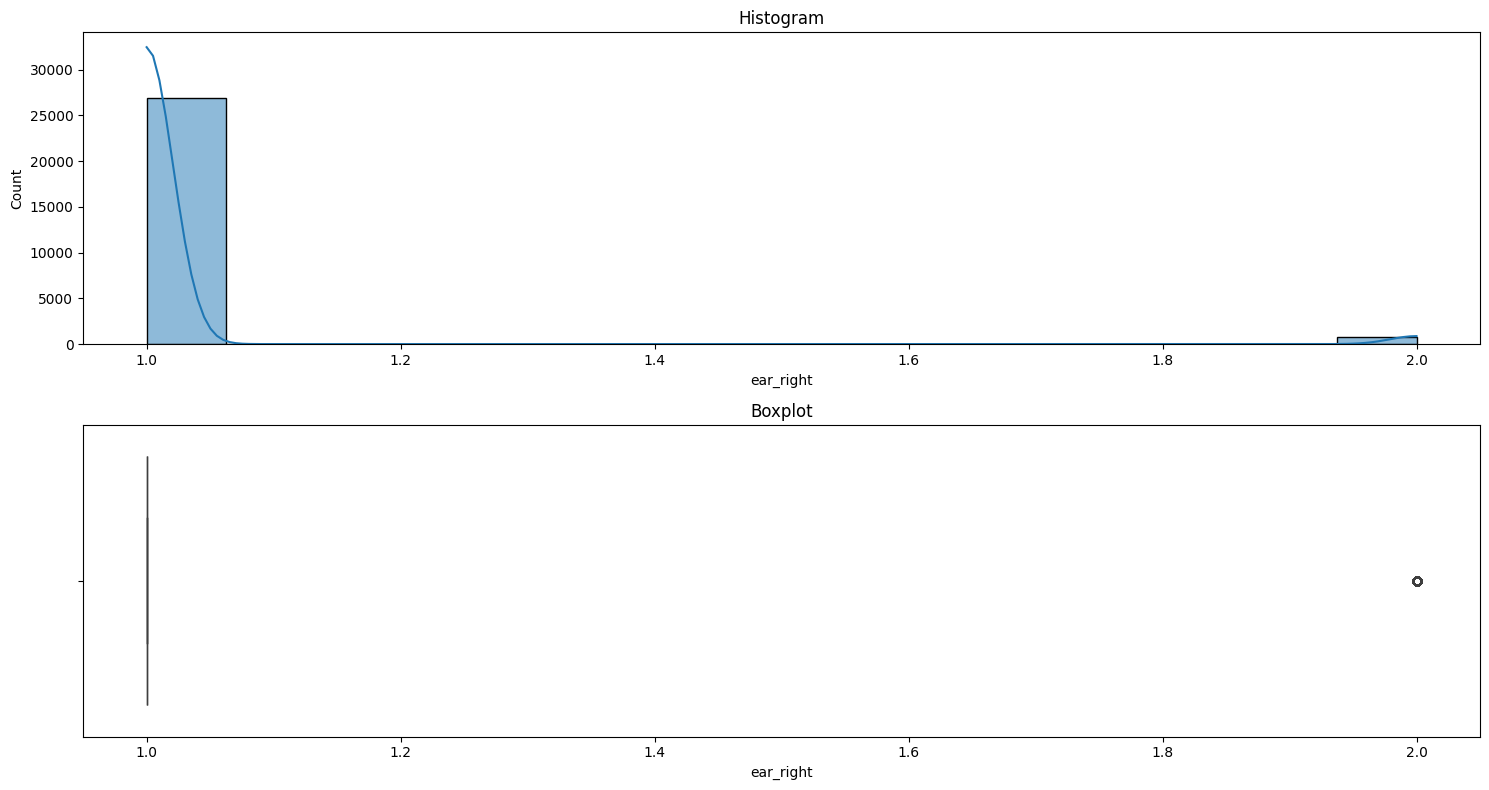

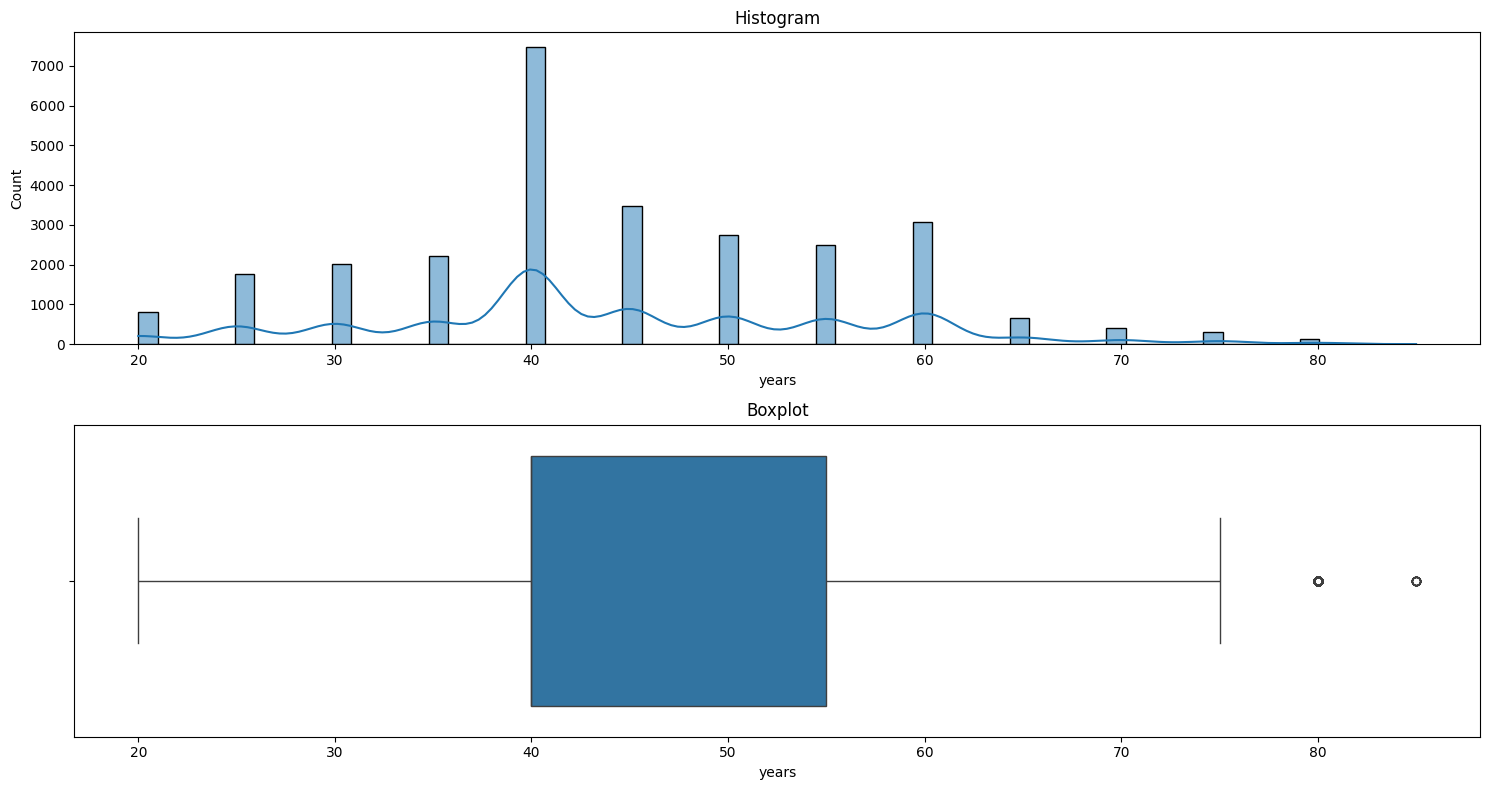

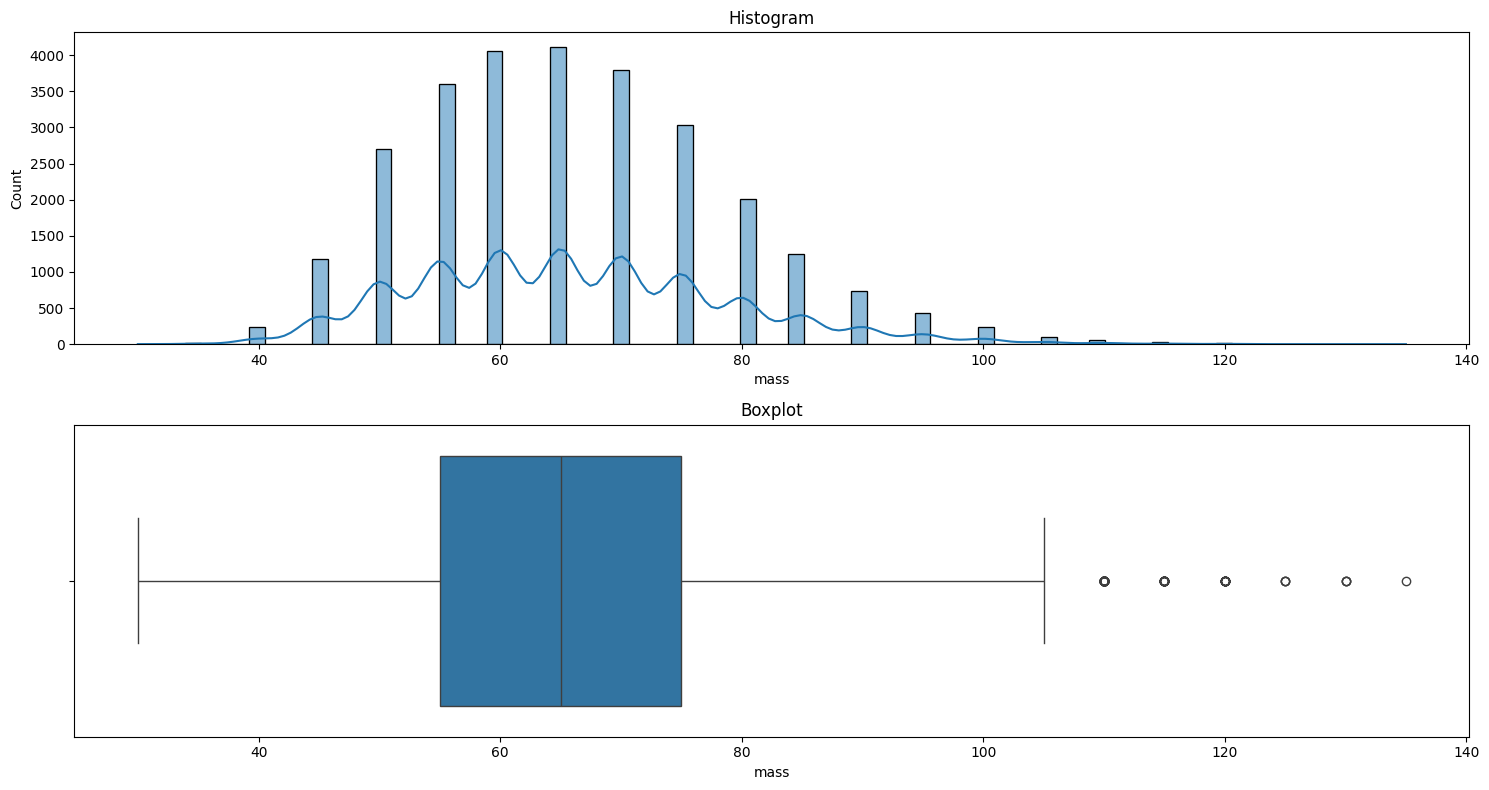

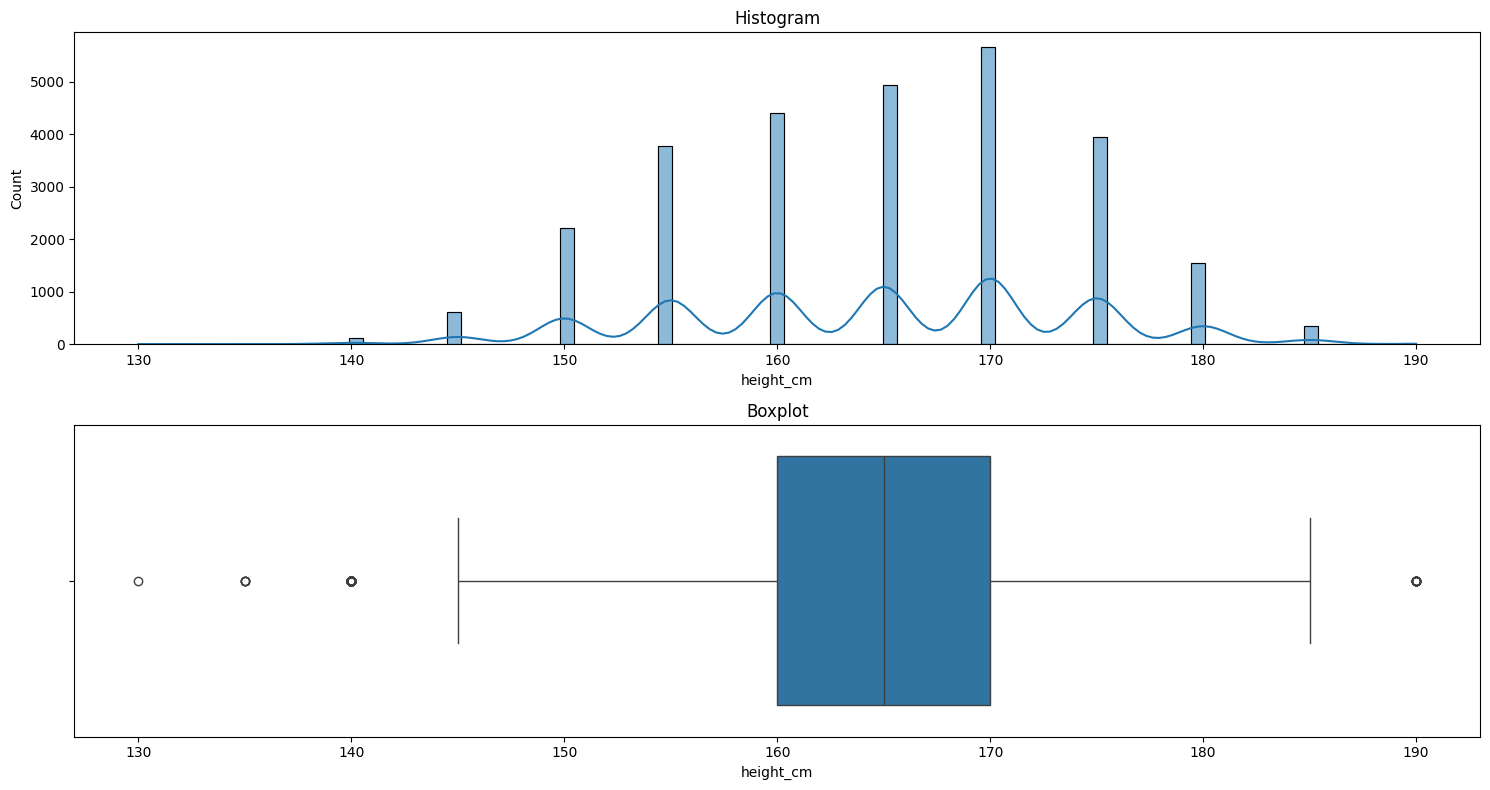

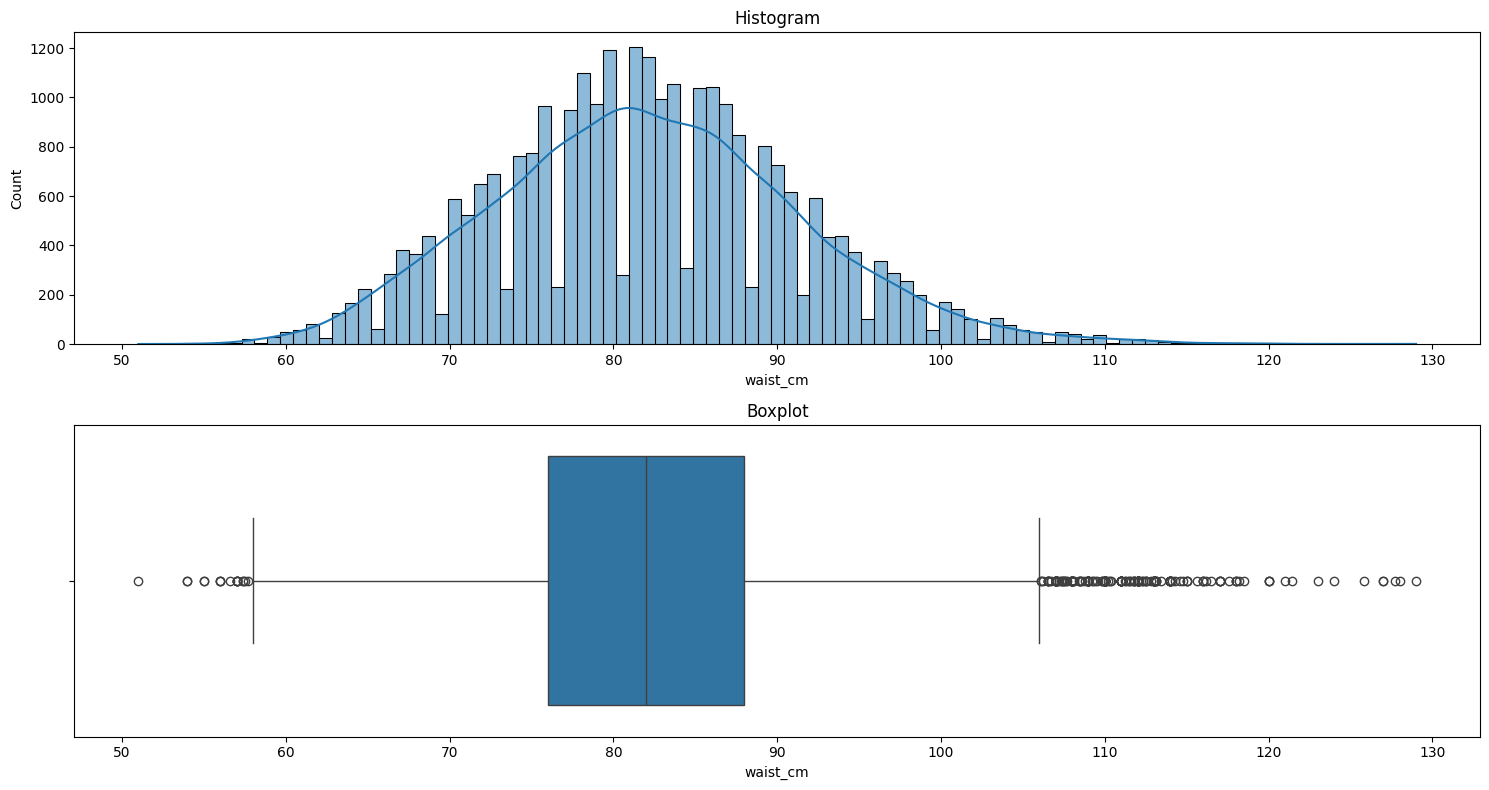

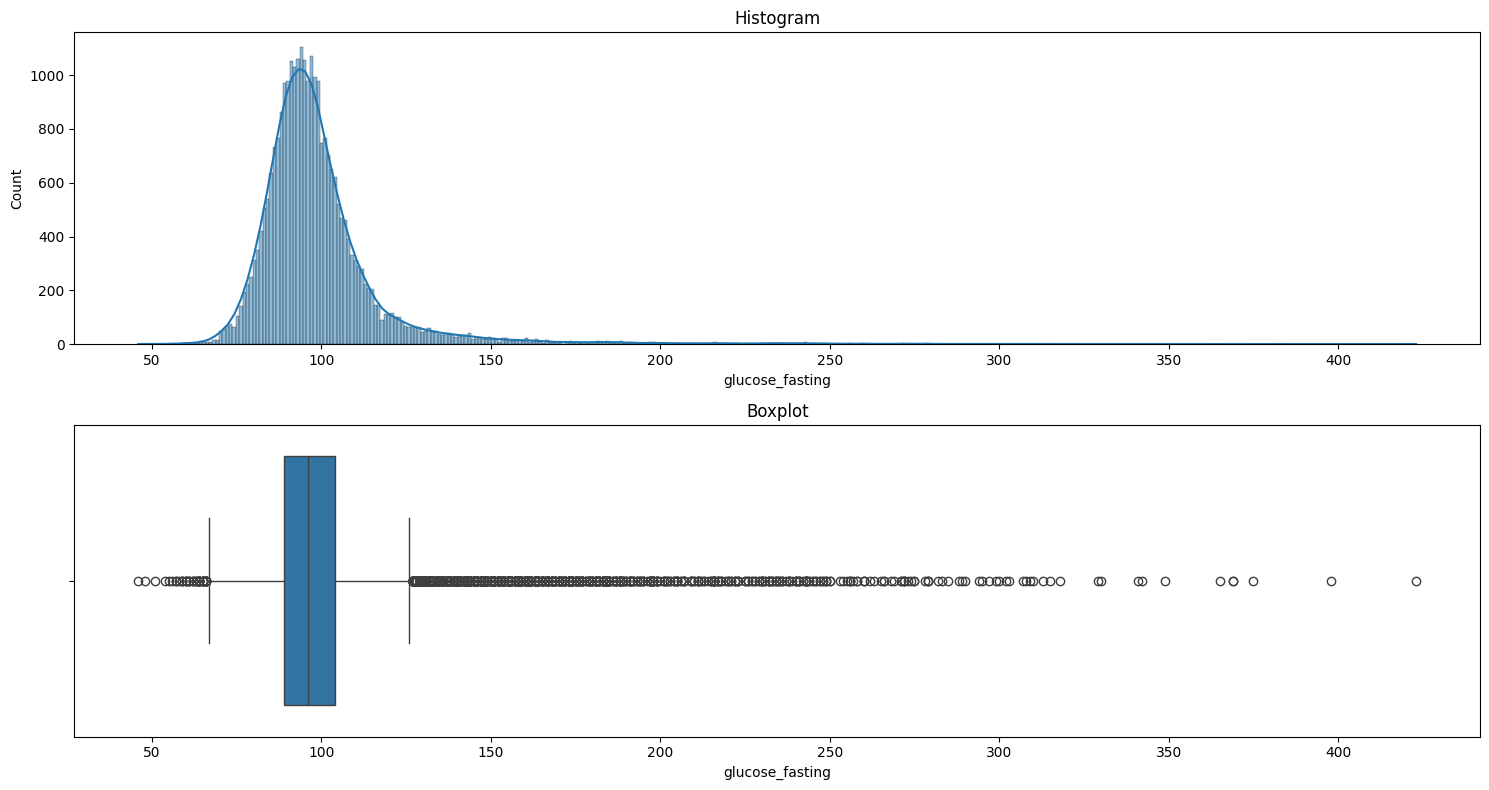

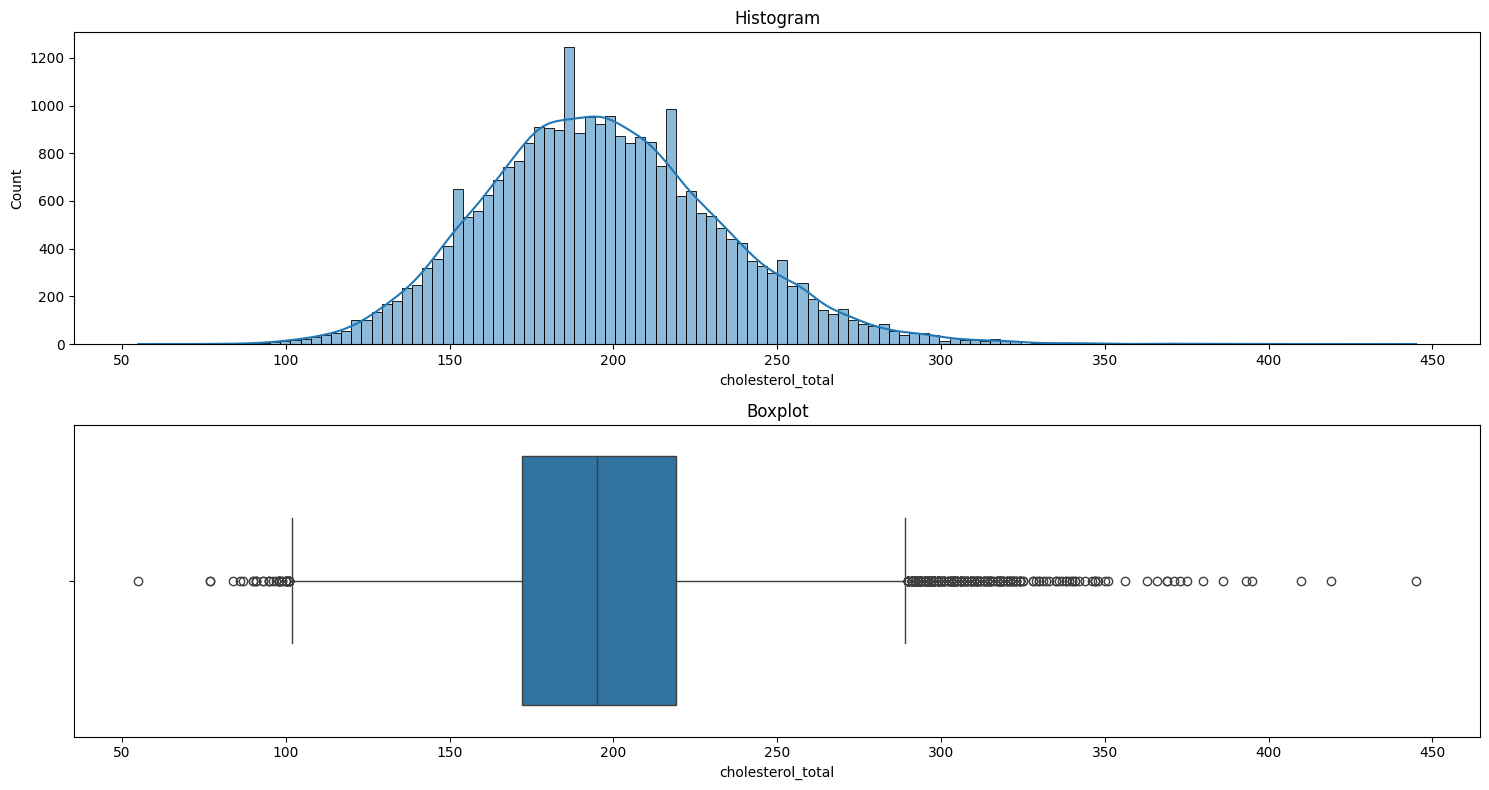

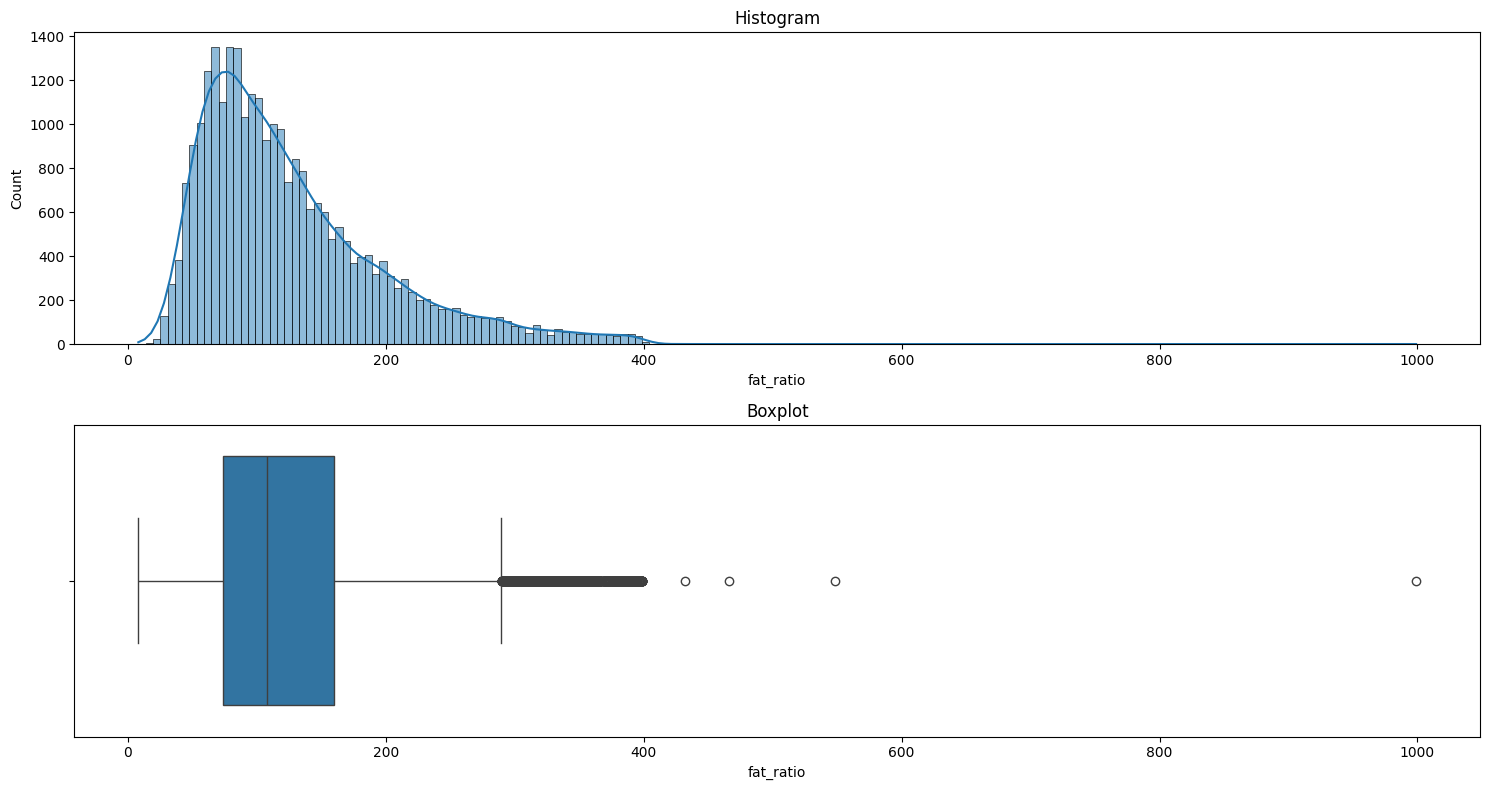

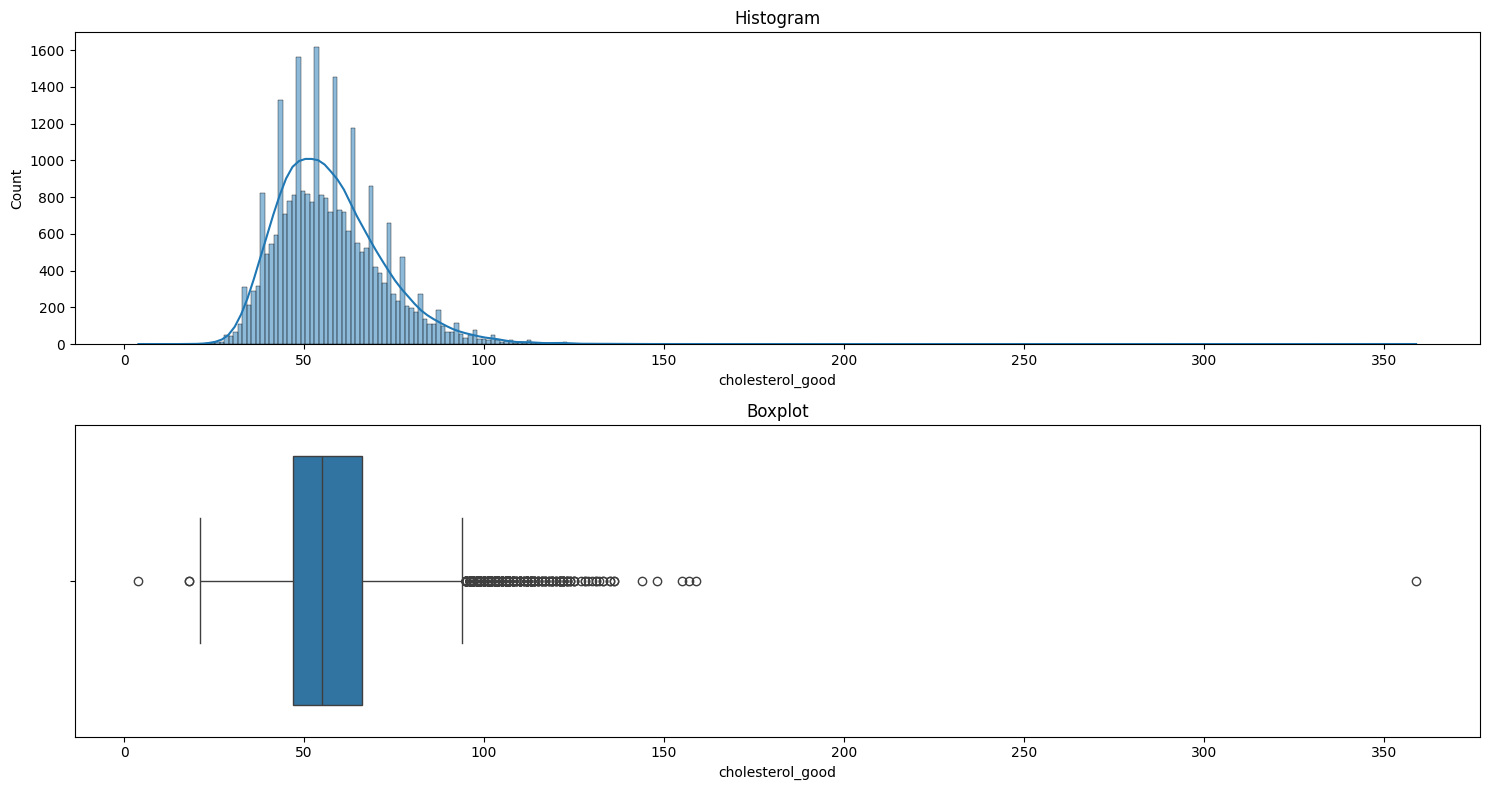

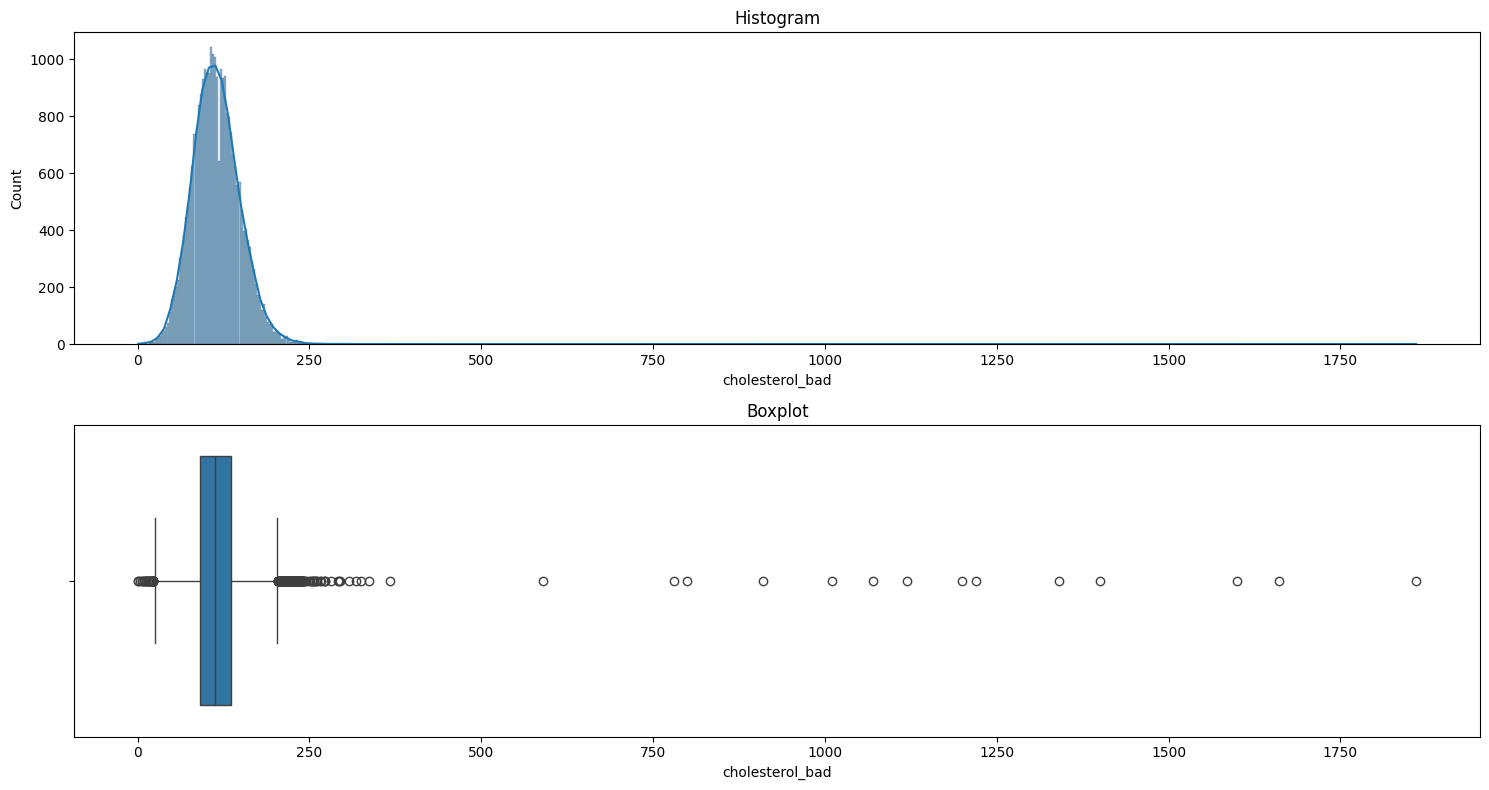

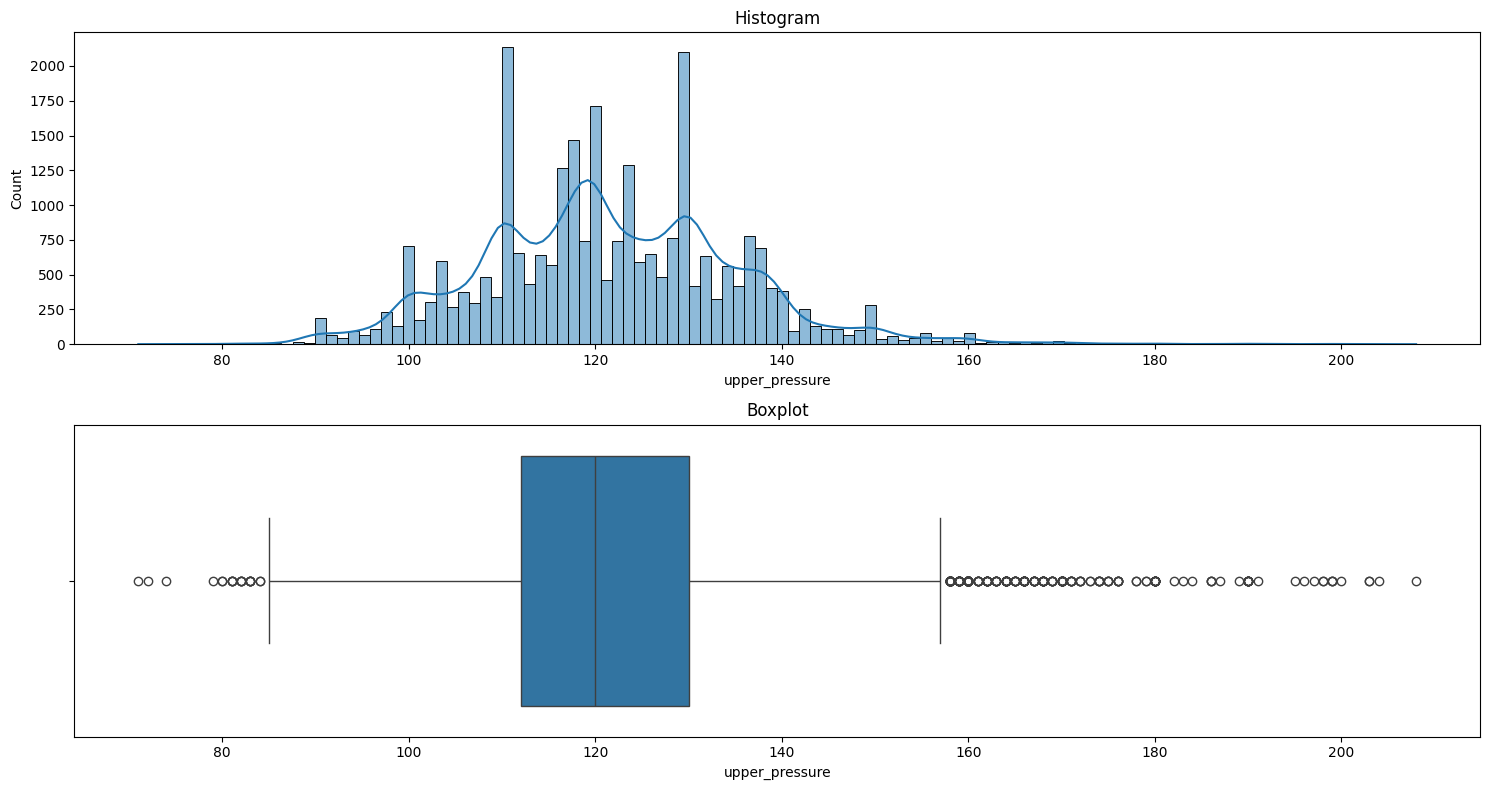

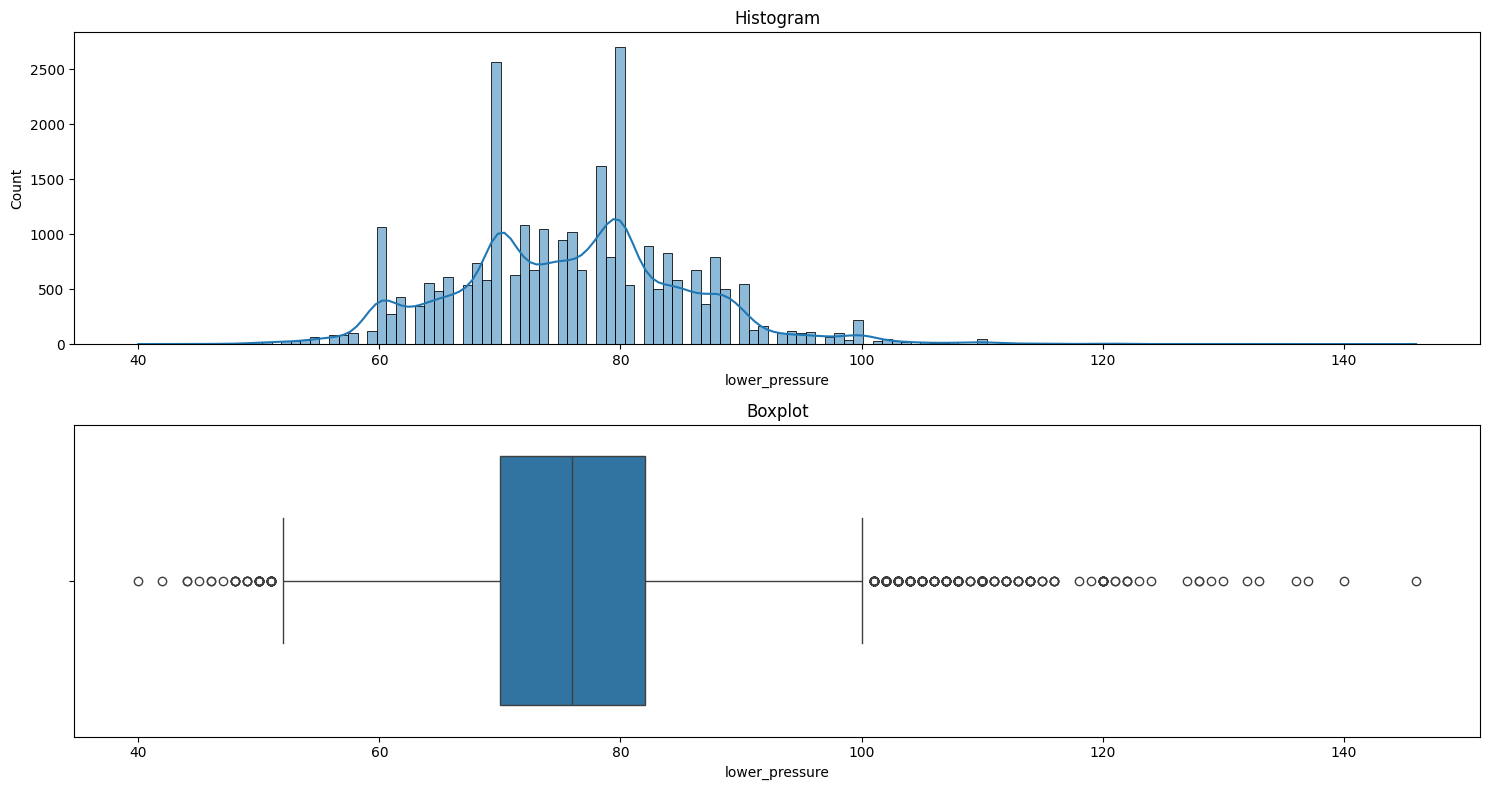

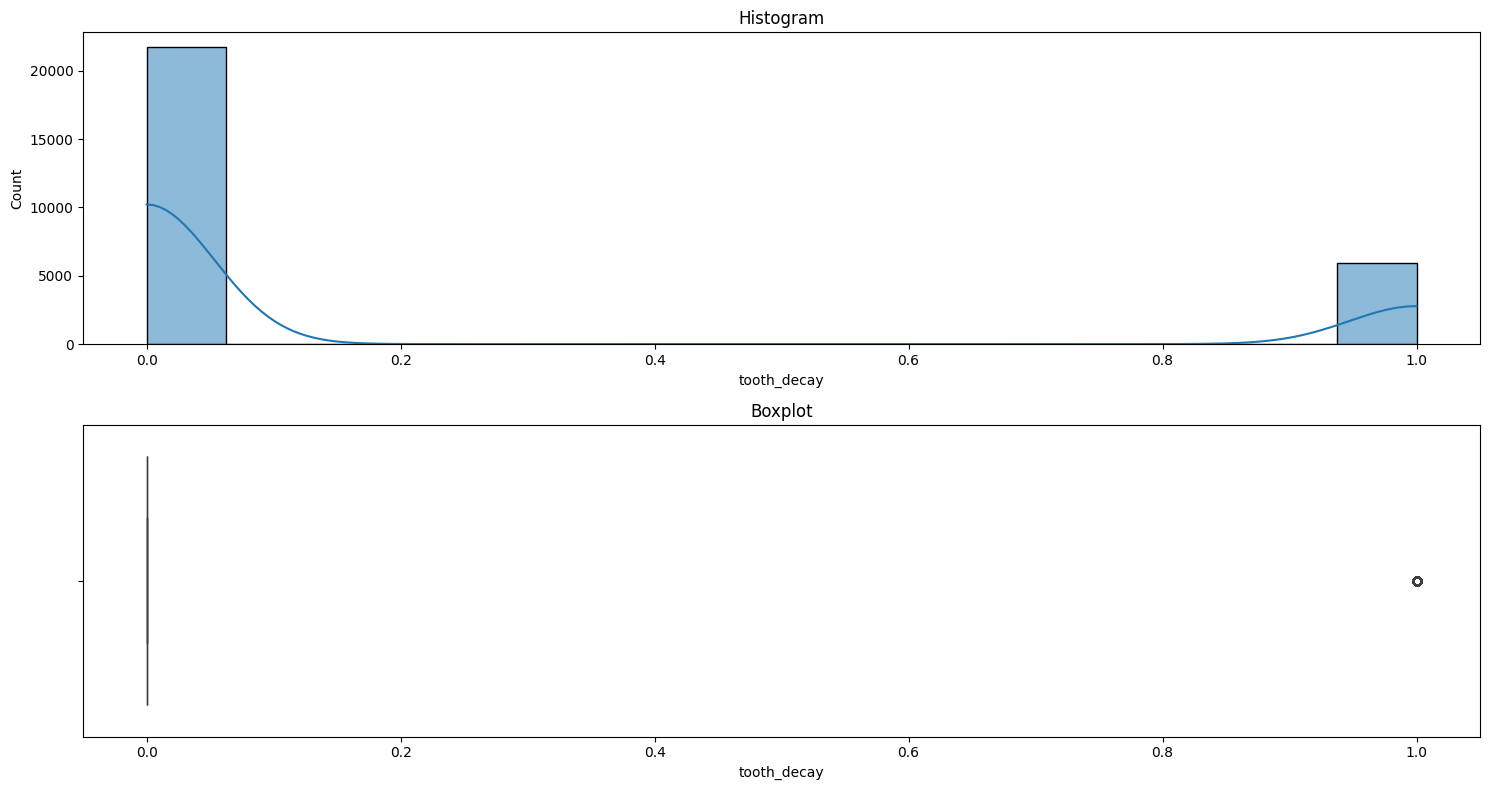

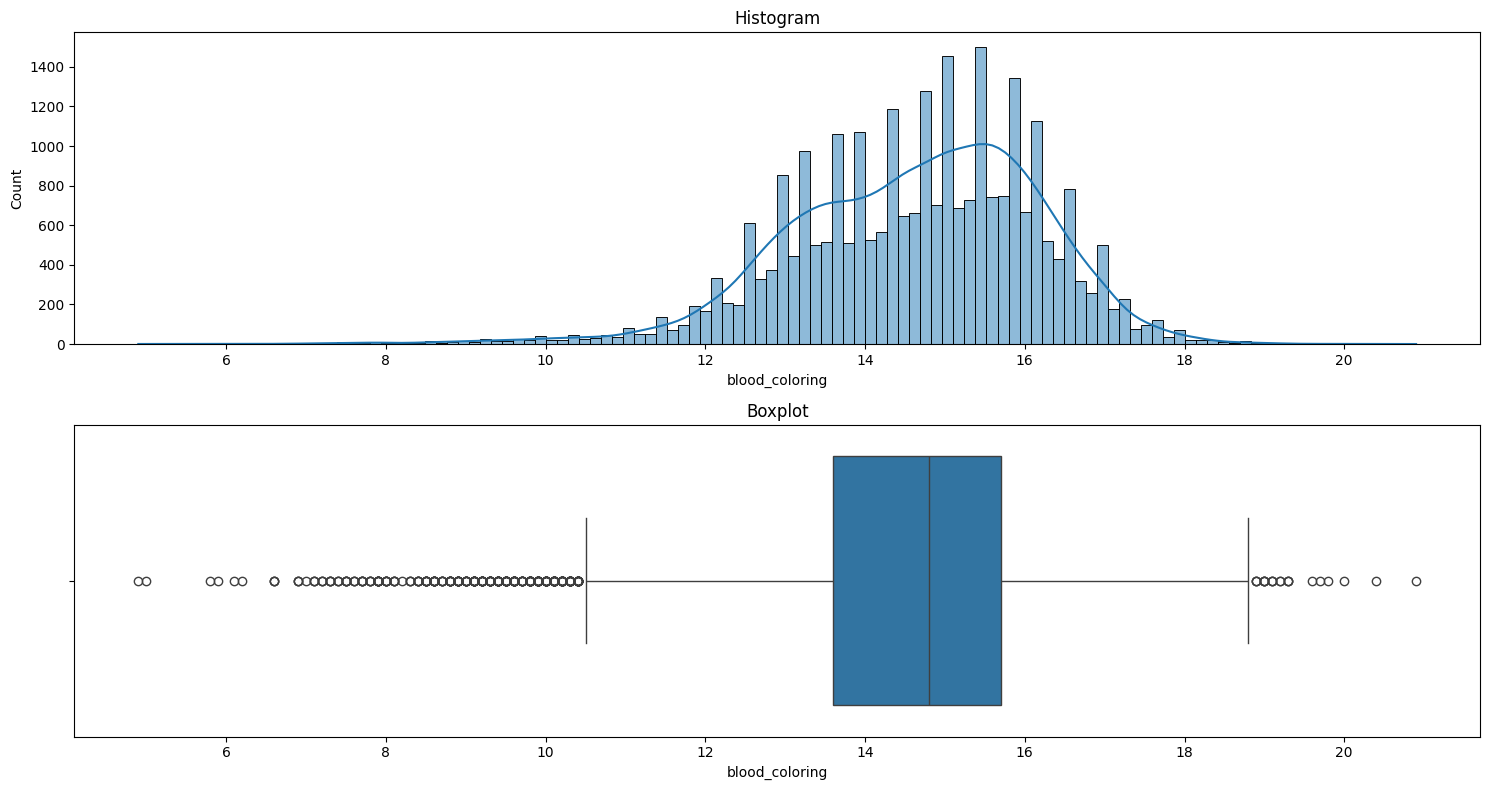

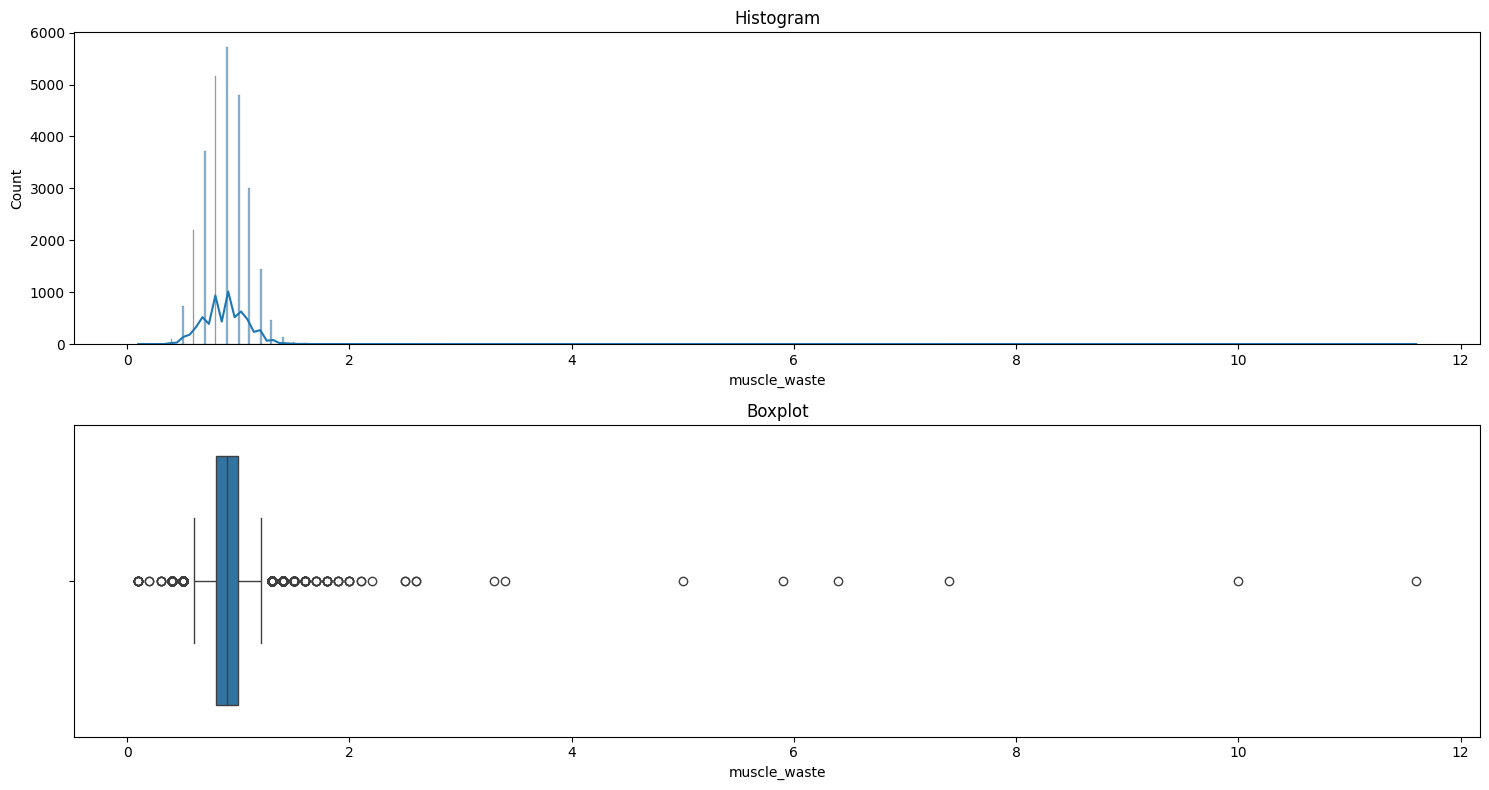

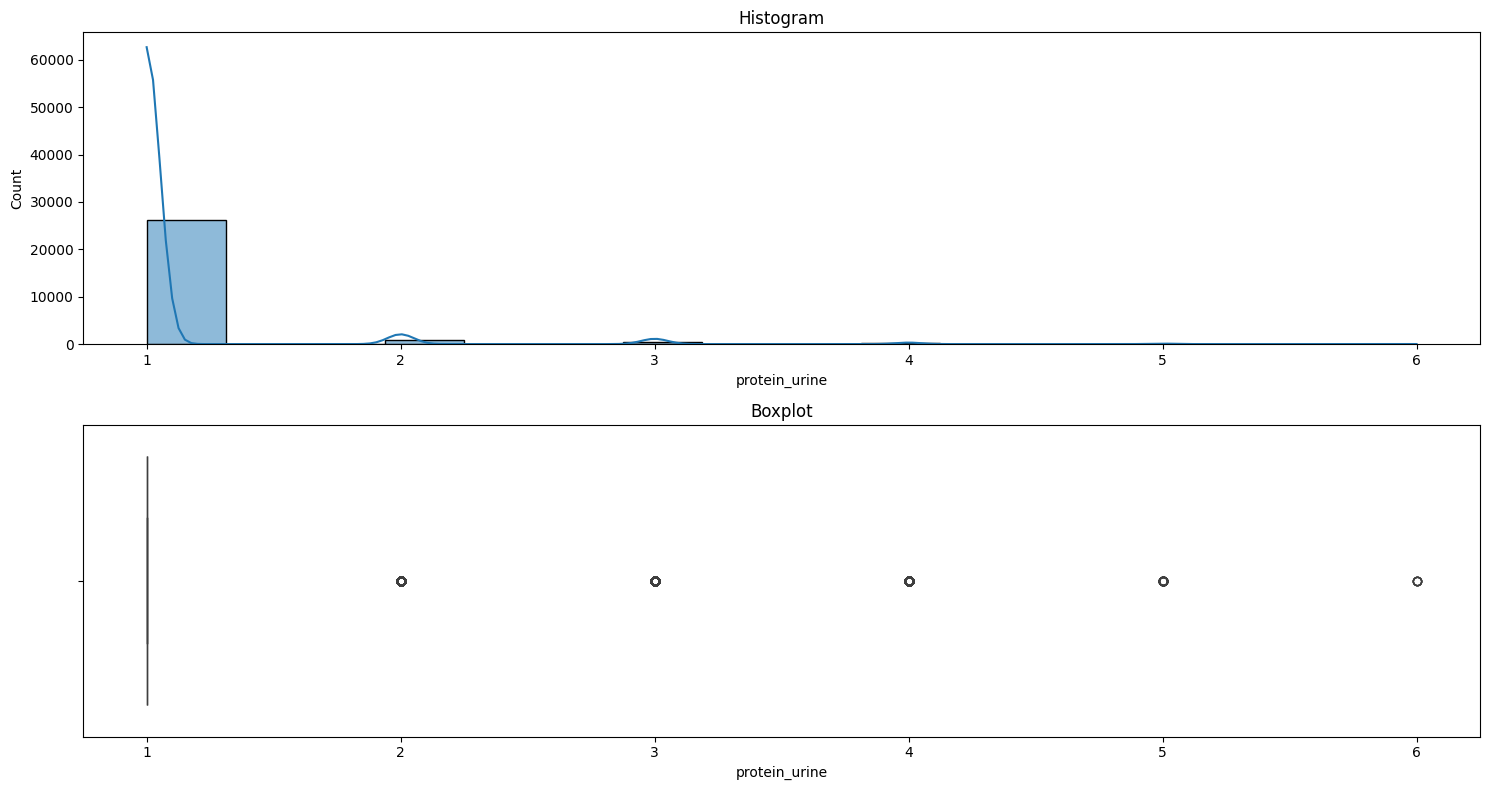

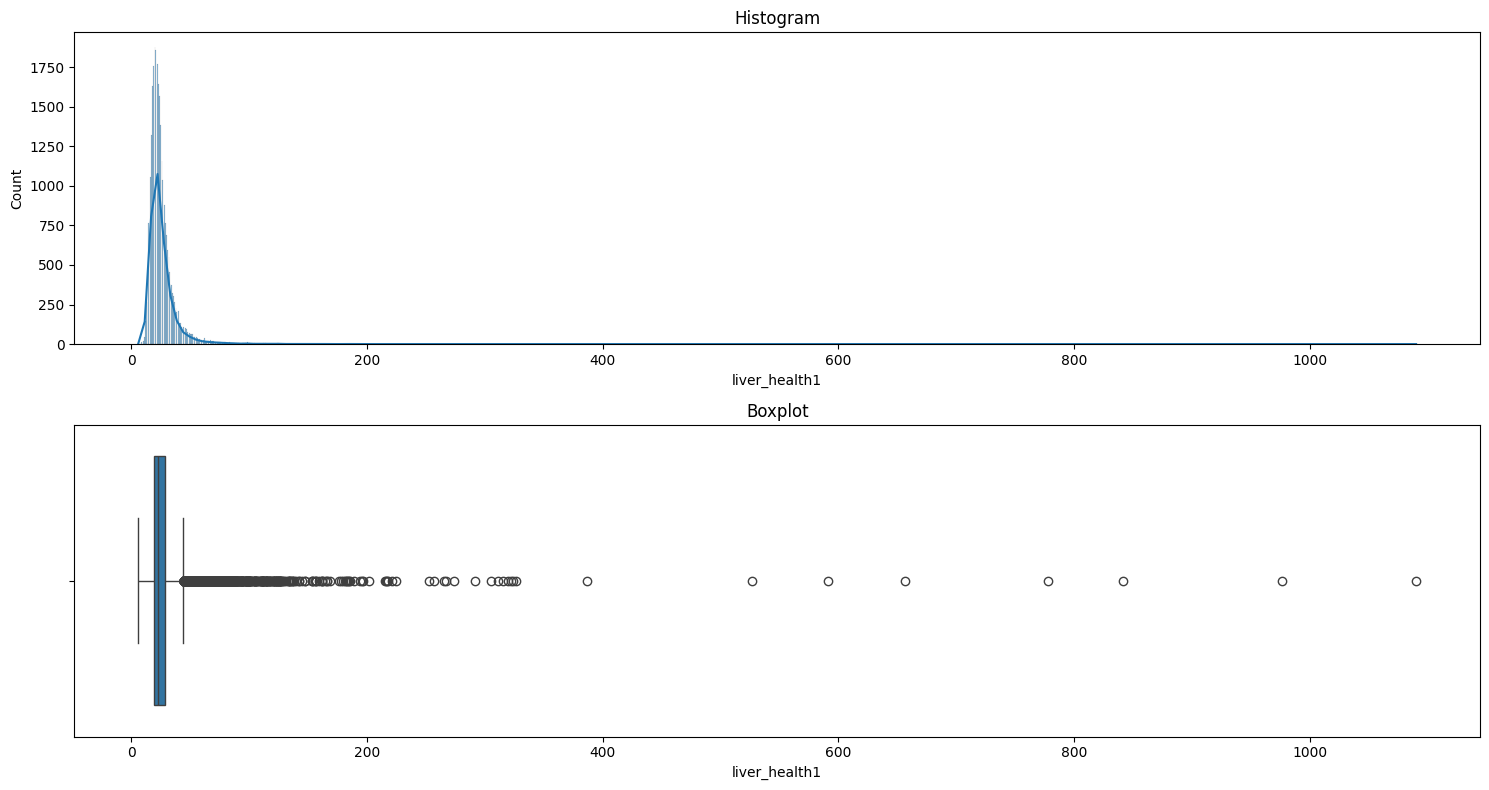

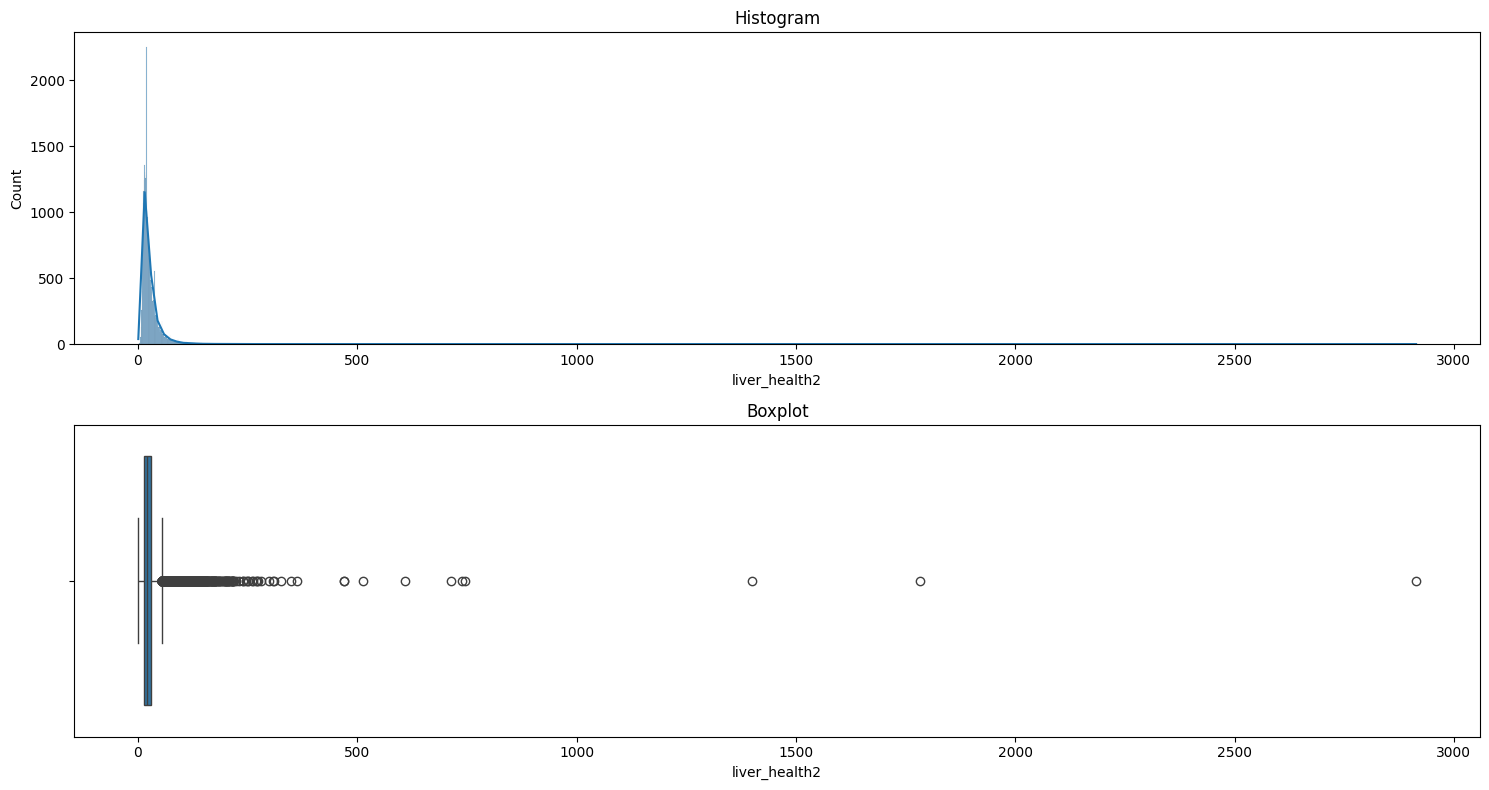

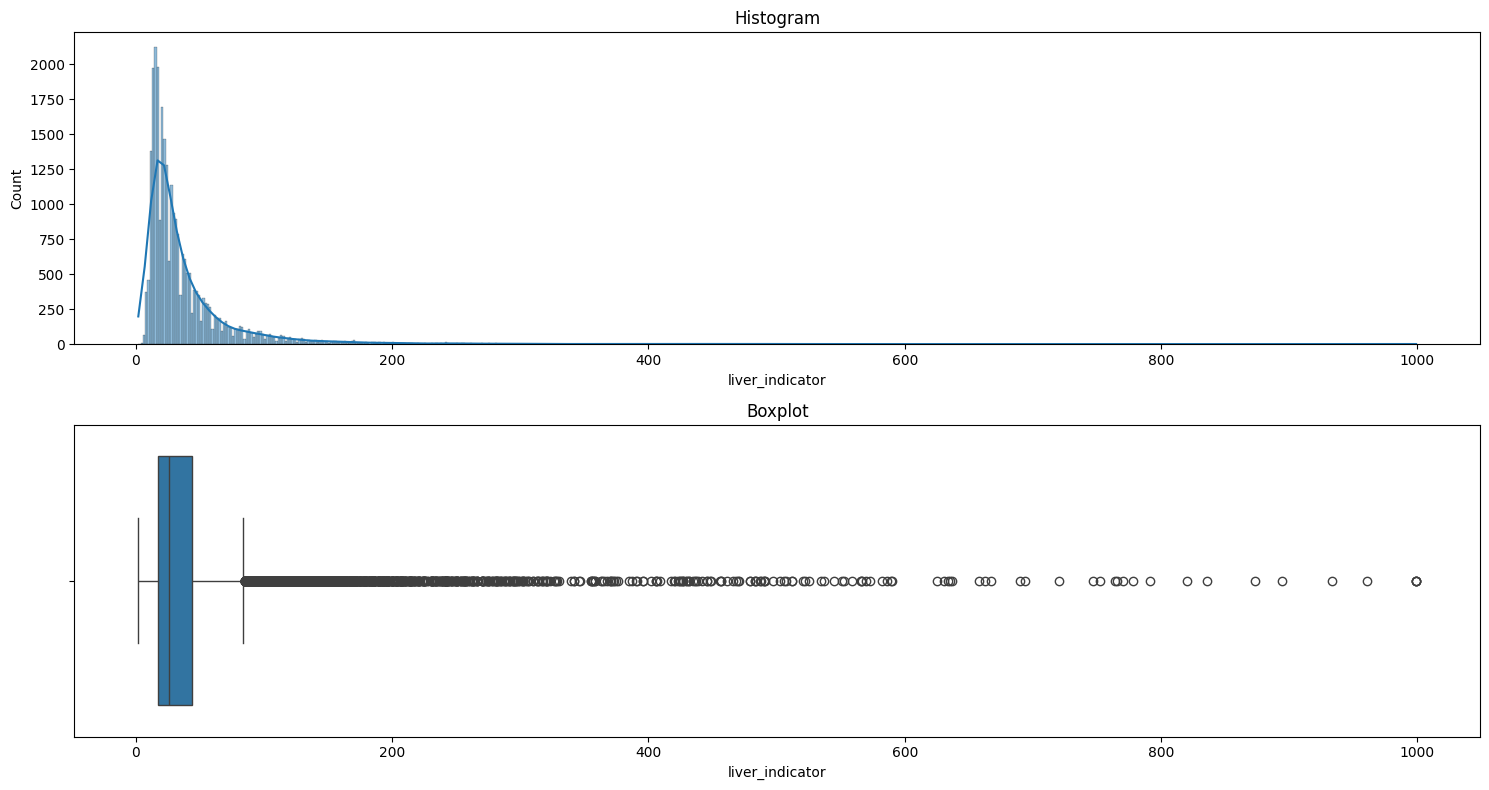

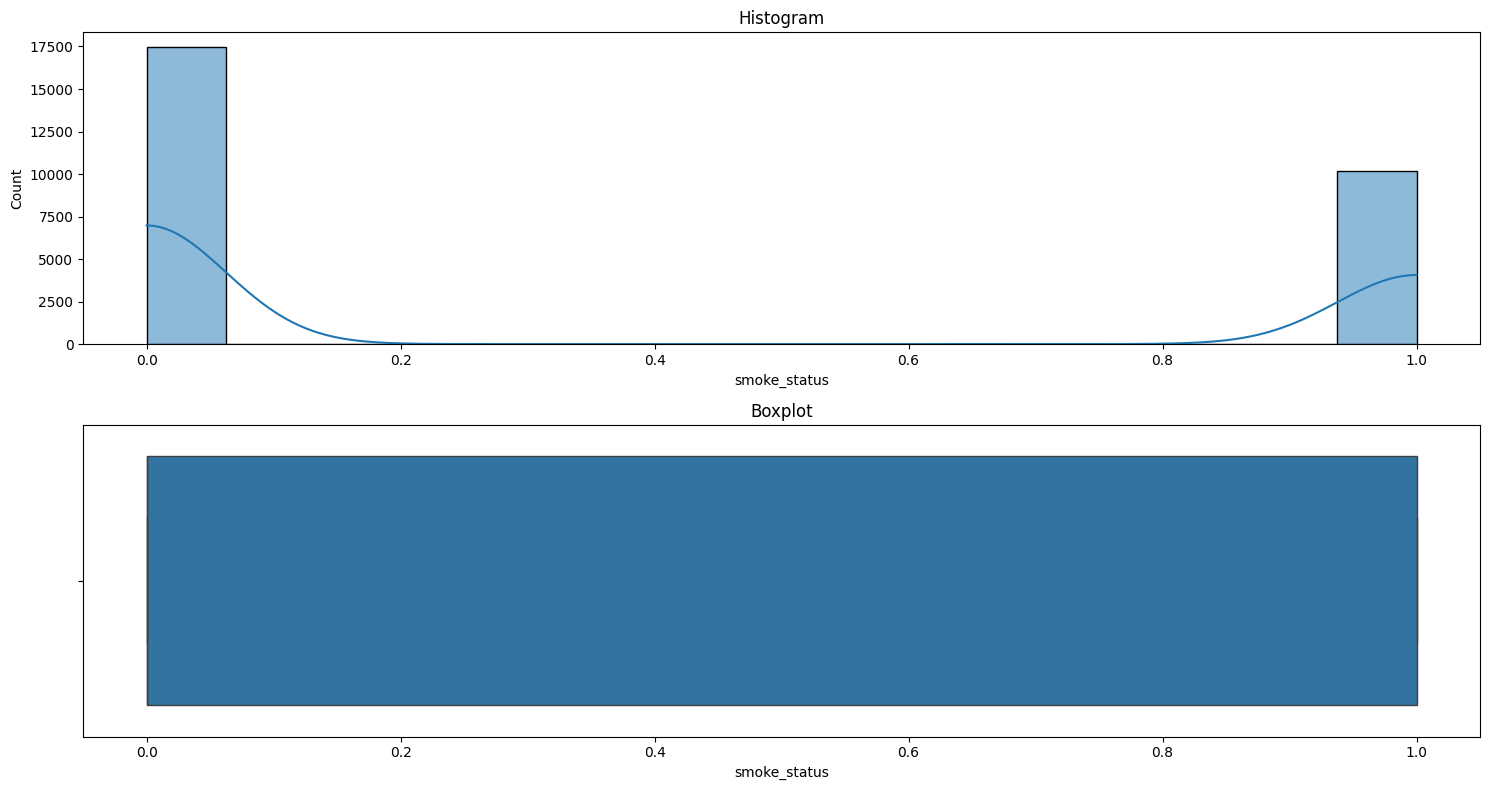

In [ ]:
for i in df_train.columns:
    plot_diff(i)

In [ ]:
df_cleaned = df_train.loc[df_train['liver_health2']<=1000]
df_cleaned = df_train.loc[df_train['liver_health1']<=400]
df_cleaned = df_train.loc[df_train['cholesterol_bad']<=1500]

In [ ]:
df_cleaned.shape

(27620, 23)

In [ ]:
df_train.columns

Index(['vision_left', 'vision_right', 'ear_left', 'ear_right', 'years', 'mass',
       'height_cm', 'waist_cm', 'glucose_fasting', 'cholesterol_total',
       'fat_ratio', 'cholesterol_good', 'cholesterol_bad', 'upper_pressure',
       'lower_pressure', 'tooth_decay', 'blood_coloring', 'muscle_waste',
       'protein_urine', 'liver_health1', 'liver_health2', 'liver_indicator',
       'smoke_status'],
      dtype='object')

# Feature importance

In [ ]:
X = df_train.drop(columns='smoke_status', axis=1)
y = df_train['smoke_status']

In [ ]:
X_cl = df_cleaned.drop(columns='smoke_status', axis=1)
y_cl = df_cleaned['smoke_status']

Cross-validated accuracy scores: [0.75018103 0.74185373 0.74456915 0.74203476 0.74800869]
Mean accuracy: 0.745329471397538
Standard deviation: 0.003293321156051219
Feature ranking:
1. feature blood_coloring (0.1126)
2. feature liver_indicator (0.1016)
3. feature height_cm (0.0907)
4. feature fat_ratio (0.0672)
5. feature waist_cm (0.0510)
6. feature cholesterol_good (0.0506)
7. feature cholesterol_bad (0.0503)
8. feature liver_health2 (0.0497)
9. feature cholesterol_total (0.0495)
10. feature glucose_fasting (0.0481)
11. feature upper_pressure (0.0448)
12. feature liver_health1 (0.0431)
13. feature mass (0.0431)
14. feature lower_pressure (0.0420)
15. feature muscle_waste (0.0417)
16. feature years (0.0416)
17. feature vision_left (0.0280)
18. feature vision_right (0.0277)
19. feature tooth_decay (0.0086)
20. feature protein_urine (0.0047)
21. feature ear_right (0.0019)
22. feature ear_left (0.0017)


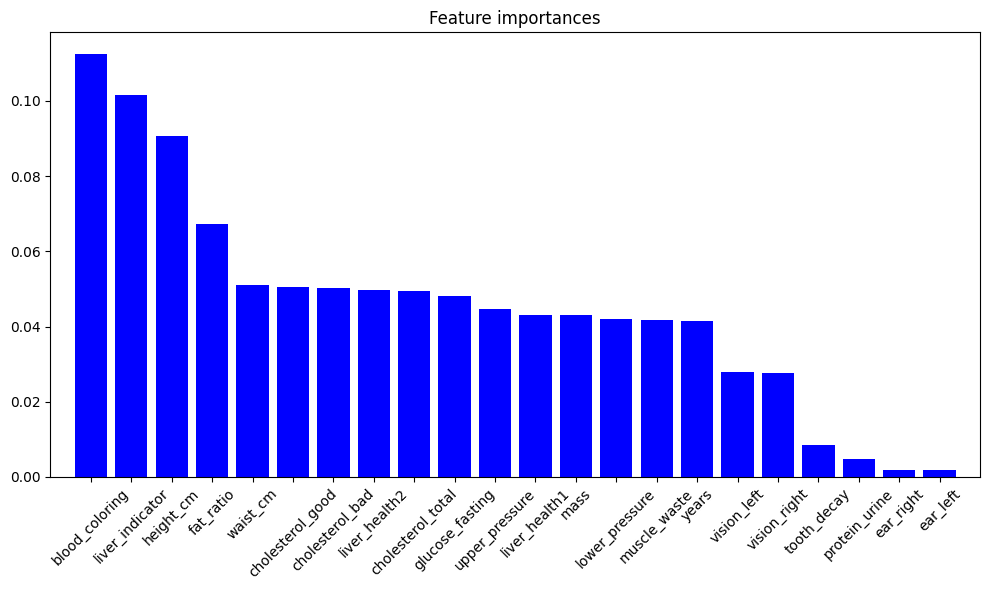

In [ ]:
# Initialize the classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Define the method of cross-validation, StratifiedKFold maintains the proportion of the target variable
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate model with cross-validation
cross_val_scores = cross_val_score(rf, X_cl, y_cl, cv=cv, scoring='accuracy')

print(f"Cross-validated accuracy scores: {cross_val_scores}")
print(f"Mean accuracy: {np.mean(cross_val_scores)}")
print(f"Standard deviation: {np.std(cross_val_scores)}")

# Feature importance across all folds
importances = np.zeros(X_cl.shape[1])

# Train and get feature importance for each fold
for train_idx, test_idx in cv.split(X_cl, y_cl):
    rf.fit(X.iloc[train_idx], y.iloc[train_idx])
    importances += rf.feature_importances_

# Average feature importances
importances /= cv.get_n_splits()

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. feature {X.columns[indices[f]]} ({importances[indices[f]]:.4f})")

# Plot the feature importances of the forest
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="b", align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()

In [ ]:
pip install optuna

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 4.9 MB/s eta 0:00:00


In [ ]:
df_train.columns

Index(['vision_left', 'vision_right', 'ear_left', 'ear_right', 'years', 'mass',
       'height_cm', 'waist_cm', 'glucose_fasting', 'cholesterol_total',
       'fat_ratio', 'cholesterol_good', 'cholesterol_bad', 'upper_pressure',
       'lower_pressure', 'tooth_decay', 'blood_coloring', 'muscle_waste',
       'protein_urine', 'liver_health1', 'liver_health2', 'liver_indicator',
       'smoke_status'],
      dtype='object')

In [ ]:
df_train['blood_pressure_interaction'] = df_train['upper_pressure'] * df_train['lower_pressure']

# Modeling

In [ ]:
X = df_train[['vision_left', 'vision_right', 'years', 'mass',
       'height_cm', 'waist_cm', 'glucose_fasting', 'cholesterol_total',
       'fat_ratio', 'cholesterol_good', 'cholesterol_bad', 'tooth_decay', 'blood_coloring', 'muscle_waste',
       'liver_health1', 'liver_health2', 'liver_indicator','blood_pressure_interaction' ]]

In [ ]:
def objectiveRFC(trial):
    model = RandomForestClassifier(
        max_depth=trial.suggest_categorical("max_depth", [2, 3, None]),
        n_estimators=trial.suggest_int("n_estimators", 30, 500),
        max_features=trial.suggest_int("max_features", 1, 10),
        min_samples_split=trial.suggest_int("min_samples_split", 2, 10),
        min_samples_leaf=trial.suggest_int("min_samples_leaf", 1, 10),
        bootstrap = trial.suggest_categorical("bootstrap", [True, False]),
        criterion = trial.suggest_categorical("criterion", ["gini", "entropy"]),
        random_state = 114514)
    score = cross_val_score(model, X, y, n_jobs=-1, cv=3, scoring="accuracy").mean()
    return score

study = optuna.create_study(direction="maximize")
study.optimize(objectiveRFC, timeout=60)

[I 2024-04-21 08:27:11,901] A new study created in memory with name: no-name-ebf8fa08-b731-47c9-9ee0-a478650d0a62
[I 2024-04-21 08:28:17,595] Trial 0 finished with value: 0.7481806416194933 and parameters: {'max_depth': None, 'n_estimators': 338, 'max_features': 6, 'min_samples_split': 8, 'min_samples_leaf': 4, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 0 with value: 0.7481806416194933.


In [ ]:
study.best_params

{'max_depth': None,
 'n_estimators': 338,
 'max_features': 6,
 'min_samples_split': 8,
 'min_samples_leaf': 4,
 'bootstrap': True,
 'criterion': 'entropy'}

In [ ]:
study.best_value

0.7481806416194933

In [ ]:
x_train, x_eval, y_train, y_eval = train_test_split(X, y,
                                                    test_size=0.1,
                                                    shuffle=True,
                                                    random_state=114514,
                                                    stratify=y
                                                    )


def objectiveXGB(trial):
    model = xgb.XGBClassifier(
        max_depth=trial.suggest_int("max_depth", 2, 20),
        n_estimators=1000,
        subsample=trial.suggest_float("subsample", 0.5, 1.0),
        colsample_bytree=trial.suggest_float("colsample_bytree", 0.5, 1.0),
        learning_rate=trial.suggest_float("learning_rate", 1e-8, 1.0, log=True),
        use_label_encoder=False,
        early_stopping_rounds=100
    )
    model.fit(x_train, y_train, eval_set=[(x_eval, y_eval)], verbose=False)
    pred = model.predict(x_eval)
    score = accuracy_score(y_eval, pred)
    return score

study = optuna.create_study(direction="maximize")
study.optimize(objectiveXGB, timeout=180)


[I 2024-04-21 08:43:29,777] A new study created in memory with name: no-name-709c54b4-f000-460a-a187-f29caa7a3ffd
[I 2024-04-21 08:43:33,702] Trial 0 finished with value: 0.7433948606587043 and parameters: {'max_depth': 3, 'subsample': 0.9597114919949656, 'colsample_bytree': 0.7371242029734453, 'learning_rate': 0.8545383069517919}. Best is trial 0 with value: 0.7433948606587043.
[I 2024-04-21 08:44:32,859] Trial 1 finished with value: 0.6319218241042345 and parameters: {'max_depth': 20, 'subsample': 0.5798946334611961, 'colsample_bytree': 0.9447180824583812, 'learning_rate': 3.477432408150863e-07}. Best is trial 0 with value: 0.7433948606587043.
[I 2024-04-21 08:44:36,593] Trial 2 finished with value: 0.7376040535649656 and parameters: {'max_depth': 18, 'subsample': 0.7335097234053696, 'colsample_bytree': 0.896145246232182, 'learning_rate': 0.1318102685695326}. Best is trial 0 with value: 0.7433948606587043.
[I 2024-04-21 08:44:49,838] Trial 3 finished with value: 0.742671009771987 and

In [ ]:
study.best_params

{'max_depth': 16,
 'subsample': 0.6851670498891439,
 'colsample_bytree': 0.7963013446085807,
 'learning_rate': 0.09714115554765944}

In [ ]:
study.best_value

0.7473760405356497

In [ ]:
import lightgbm as lgb

def objectiveLGBM(trial):
    params = {
        "learning_rate": trial.suggest_float("learning_rate", 1e-4, 1, log=True),
        "n_estimators": 1000,
        "max_depth": trial.suggest_int("max_depth", 3, 13),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 50),
        "reg_lambda": trial.suggest_float("reg_lambda", 1e-3, 1e3, log=True),
        "reg_alpha": trial.suggest_float("reg_alpha", 1e-3, 1e3, log=True),
    }
    model = lgb.LGBMClassifier(
        verbose=-1,
        num_leaves=80,
        **params
    )
    score = cross_val_score(model, X, y, n_jobs=-1, cv=3, scoring="accuracy").mean()
    return score

study = optuna.create_study(direction="maximize")
study.optimize(objectiveLGBM, timeout=180)

[I 2024-04-21 08:10:49,228] A new study created in memory with name: no-name-df498a92-86a7-4807-8885-17e23105926c
<ipython-input-69-bd93fe03629a>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 1),
<ipython-input-69-bd93fe03629a>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 1e3),
<ipython-input-69-bd93fe03629a>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "reg_alpha": trial.sugges

In [ ]:
study.best_params

{'learning_rate': 0.0026494953728548975,
 'max_depth': 12,
 'min_child_samples': 43,
 'reg_lambda': 114.37793236051259,
 'reg_alpha': 0.013397679157418628}

In [ ]:
study.best_value

0.7413746705082896

In [ ]:
X_train, X_eval, y_train, y_eval = train_test_split(X, y,
                                                    test_size=0.1,
                                                    shuffle=True,
                                                    random_state=42,
                                                    stratify=y)
def objective_KNN(trial):
    # Defining the hyperparameters to tune
    n_neighbors = trial.suggest_int('n_neighbors', 1, 30)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
    algorithm = trial.suggest_categorical('algorithm', ['ball_tree', 'kd_tree', 'brute'])
    p = trial.suggest_int('p', 1, 2)  # p=1: manhattan_distance, p=2: euclidean_distance

    # Creating the KNN classifier
    classifier = KNeighborsClassifier(
        n_neighbors=n_neighbors,
        weights=weights,
        algorithm=algorithm,
        p=p
    )

    # Training the model
    classifier.fit(X_train, y_train)
    # Predicting the evaluation set
    preds = classifier.predict(X_eval)
    # Calculating accuracy
    accuracy = accuracy_score(y_eval, preds)
    return accuracy

# Create a study object
study = optuna.create_study(direction='maximize')
# Execute an optimization by using the study object
study.optimize(objective_KNN, n_trials=100)

# Best trial result
print(f"Best trial score: {study.best_trial.value}")
print(f"Best hyperparameters: {study.best_trial.params}")

# Re-train with the best hyperparameters
best_classifier = KNeighborsClassifier(**study.best_trial.params)
best_classifier.fit(X_train, y_train)

[I 2024-04-21 08:13:58,339] A new study created in memory with name: no-name-d92f6cec-1021-41f7-aff8-995f92ffcf83
[I 2024-04-21 08:13:59,926] Trial 0 finished with value: 0.6854867897213174 and parameters: {'n_neighbors': 7, 'weights': 'uniform', 'algorithm': 'kd_tree', 'p': 2}. Best is trial 0 with value: 0.6854867897213174.
[I 2024-04-21 08:14:03,251] Trial 1 finished with value: 0.7100977198697068 and parameters: {'n_neighbors': 16, 'weights': 'uniform', 'algorithm': 'kd_tree', 'p': 1}. Best is trial 1 with value: 0.7100977198697068.
[I 2024-04-21 08:14:06,161] Trial 2 finished with value: 0.7068403908794788 and parameters: {'n_neighbors': 17, 'weights': 'uniform', 'algorithm': 'brute', 'p': 1}. Best is trial 1 with value: 0.7100977198697068.
[I 2024-04-21 08:14:06,699] Trial 3 finished with value: 0.672819399203764 and parameters: {'n_neighbors': 3, 'weights': 'uniform', 'algorithm': 'brute', 'p': 2}. Best is trial 1 with value: 0.7100977198697068.
[I 2024-04-21 08:14:13,361] Trial

Best trial score: 0.7122692725298588
Best hyperparameters: {'n_neighbors': 18, 'weights': 'uniform', 'algorithm': 'ball_tree', 'p': 1}


KNeighborsClassifier(algorithm='ball_tree', n_neighbors=18, p=1)

In [ ]:
study.best_params

{'n_neighbors': 18, 'weights': 'uniform', 'algorithm': 'ball_tree', 'p': 1}

In [ ]:
study.best_value

0.7122692725298588

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X_train, X_eval, y_train, y_eval = train_test_split(X, y,
                                                    test_size=0.1,
                                                    shuffle=True,
                                                    random_state=42,
                                                    stratify=y)

def objective_log_reg(trial):
    # Hyperparameters to tune
    C = trial.suggest_float('C', 1e-6, 1e2, log=True)  # Regularization strength
    solver = trial.suggest_categorical('solver', ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'])
    max_iter = trial.suggest_int('max_iter', 100, 1000)  # Maximum number of iterations

    # Define the Logistic Regression model
    # Wrap the model in a pipeline that includes scaling, important for logistic regression
    model = make_pipeline(StandardScaler(), LogisticRegression(C=C, solver=solver, max_iter=max_iter, random_state=42))

    # Training the model
    model.fit(X_train, y_train)
    # Predicting the evaluation set
    preds = model.predict(X_eval)
    # Calculating accuracy
    accuracy = accuracy_score(y_eval, preds)
    return accuracy

# Create a study object
study = optuna.create_study(direction='maximize')
# Execute an optimization by using the study object
study.optimize(objective_log_reg, n_trials=100)

# Best trial result
print(f"Best trial score: {study.best_trial.value}")
print(f"Best hyperparameters: {study.best_trial.params}")

# Re-train with the best hyperparameters
best_params = study.best_trial.params
best_model = make_pipeline(StandardScaler(), LogisticRegression(C=best_params['C'], solver=best_params['solver'], max_iter=best_params['max_iter'], random_state=42))
best_model.fit(X_train, y_train)

[I 2024-04-21 08:20:26,264] A new study created in memory with name: no-name-e9c50570-c02b-4501-b2b1-0b616432f5f3
[I 2024-04-21 08:20:27,934] Trial 0 finished with value: 0.7155266015200868 and parameters: {'C': 5.210407825190871, 'solver': 'saga', 'max_iter': 853}. Best is trial 0 with value: 0.7155266015200868.
[I 2024-04-21 08:20:29,453] Trial 1 finished with value: 0.7151646760767282 and parameters: {'C': 0.055362584029025115, 'solver': 'saga', 'max_iter': 752}. Best is trial 0 with value: 0.7155266015200868.
[I 2024-04-21 08:20:29,920] Trial 2 finished with value: 0.7148027506333695 and parameters: {'C': 0.18028950609626057, 'solver': 'sag', 'max_iter': 242}. Best is trial 0 with value: 0.7155266015200868.
[I 2024-04-21 08:20:30,020] Trial 3 finished with value: 0.7100977198697068 and parameters: {'C': 0.0011747539448690961, 'solver': 'lbfgs', 'max_iter': 965}. Best is trial 0 with value: 0.7155266015200868.
[I 2024-04-21 08:20:30,486] Trial 4 finished with value: 0.71588852696344

Best trial score: 0.7158885269634455
Best hyperparameters: {'C': 3.32431394709676, 'solver': 'sag', 'max_iter': 212}


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=3.32431394709676, max_iter=212,
                                    random_state=42, solver='sag'))])

In [ ]:
study.best_params

{'C': 3.32431394709676, 'solver': 'sag', 'max_iter': 212}

In [ ]:
study.best_value

0.7158885269634455

In [ ]:
model = xgb.XGBClassifier(
    max_depth=16,
    subsample=0.6851670498891439,
    colsample_bytree=0.7963013446085807,
    learning_rate=0.09714115554765944,
    objective='binary:logistic',  # Make sure this matches your problem type
    eval_metric='logloss',  # This parameter should actually be set in the fit method or via a custom callback
    use_label_encoder=False  # To avoid a deprecation warning from XGBoost
)
model.fit(X,y)
pred = model.predict(df_test)

In [ ]:
result = pd.DataFrame(data={'smoke_status': pred}, columns = ['smoke_status'])

In [ ]:
result.to_csv('/content/drive/My Drive/Datasets/ML_exam/my_predictions.csv', index=False)